<a href="https://colab.research.google.com/github/sgirabin/nyp-iti105-project/blob/main/ITI105_Project_Implementation_IsakRabin(4466624P).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITI105: Stock Price Prediction using Machine Learning

# Introduction

 We predict the direction of S&P 500 (Up / Down / Sideways) using classical ML. This is a 3‚Äëclass classification task trained on Yahoo Finance data and technical indicators.

 We compare Logistic Regression (baseline). Decision Tree, Random Forest, and xgBosst classifier, track experiments with MLflow.

# Pre-requisite

Before we start, we need to ensure all the libraries are available. For this project, we are using the following libraries

| Libraries | Description  | Reference |
|-----------|--------------|-----------|
| `yfinance` |  To download SP500 Historical Data | https://pypi.org/project/yfinance/ |
| `ta` |  To calculate technical indicator of SP500 which be used for training the model |  https://pypi.org/project/ta/ |
| `mlflow` | To logged our model experiments (training and tuning) | https://pypi.org/project/mlflow/ |



In [1]:
# download and install yfinance , yfinance technical indicators, mlflow python library
!pip install yfinance ta mlflow pyngrok joblib --upgrade --no-cache-dir

  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.4/26.4 MB 116.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 79.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 52.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 308.4/308.4 kB 97.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 247.4/247.4 kB 172.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 147.8/147.8 kB 212.0 MB/s eta 0:00:00
   ‚îÅ

# Implementation

## Step 1: Import necessary libraries

In [4]:
import yfinance as yf
import ta

import os
import getpass
import requests
import subprocess
import socket
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
import mlflow

from google.colab import drive
from joblib import dump, load
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient
from pyngrok import ngrok, conf
from scipy.stats import norm

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import (TimeSeriesSplit, GridSearchCV,
                                     RandomizedSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, classification_report,
                             ConfusionMatrixDisplay, confusion_matrix,precision_recall_curve, average_precision_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_fscore_support)
from xgboost import XGBClassifier

## Step 2: Importing Dataset



At first we need to download our dataset from Yahoo Finance. Our target dataset range is from **1st January 1970** to **30th June 2025**.

In [5]:
# dataset parameter
TICKER = "^GSPC"
START_DATE = "1970-01-01"
END_DATE = "2025-06-30"

# percentage threshold for label movement
INITIAL_THRESHOLD = 0.5
ADJUSTED_THRESHOLD = 0.3

# storage
BASE_PATH = "/content/drive/MyDrive/NYP/ITI105"
MLFLOW_PATH = f"{BASE_PATH}/mllogs"
MODELS_PATH = f"{MLFLOW_PATH}/models"

# Input File
FILE_NAME = "sp500_daily_history.csv"

# ngrok token
NGROK_TOKEN = "2t8TIG1geBuF6yFcNXZYkkxTqzg_7qGykBf4NYA9AKwvB9u8R"
PORT = 5000

In [6]:
# Mount Google Drive
drive.mount("/content/drive")

os.makedirs(os.path.dirname(BASE_PATH), exist_ok=True)
os.makedirs(os.path.dirname(MLFLOW_PATH), exist_ok=True)
os.makedirs(os.path.dirname(MODELS_PATH), exist_ok=True)


Mounted at /content/drive


In [6]:
# Function to load the data
def load_price_data(ticker=TICKER, start=START_DATE,
                    end=END_DATE, filename=FILE_NAME):

    data_path = os.path.join(BASE_PATH, filename)
    if os.path.exists(data_path):
        df = pd.read_csv(data_path, parse_dates=["Date"])
        df = df.sort_values("Date").reset_index(drop=True).set_index("Date")
        return df

    df = yf.download(ticker, start=start, end=end,
                     auto_adjust=False, progress=False)
    df = df.rename_axis("Date").reset_index()

    # save CSV with Date column
    df.to_csv(data_path, index=False)
    return df

In [7]:
# Load the data
raw_data = load_price_data()

In [8]:
# Check first 5 rows of our dataset
print("\nFirst 5 rows:")
print(raw_data.head())


First 5 rows:
                    Adj Close              Close               High  \
Date                                                                  
1970-01-02               93.0               93.0  93.54000091552734   
1970-01-05  93.45999908447266  93.45999908447266              94.25   
1970-01-06  92.81999969482422  92.81999969482422  93.80999755859375   
1970-01-07  92.62999725341797  92.62999725341797  93.37999725341797   
1970-01-08  92.68000030517578  92.68000030517578  93.47000122070312   

                          Low               Open    Volume  
Date                                                        
1970-01-02  91.79000091552734  92.05999755859375   8050000  
1970-01-05  92.52999877929688               93.0  11490000  
1970-01-06  92.12999725341797  93.45999908447266  11460000  
1970-01-07  91.93000030517578  92.81999969482422  10010000  
1970-01-08  91.98999786376953  92.62999725341797  10670000  


## Step 3: Data Preparations

### Step 3.1: Data Structure Analysis

In [9]:
# Show dataset shape
print("Data shape:", raw_data.shape)

Data shape: (13993, 6)


In [10]:
# Show data types
print("\nData types:")
print(raw_data.dtypes)


Data types:
Adj Close    object
Close        object
High         object
Low          object
Open         object
Volume       object
dtype: object


In [11]:
# Basic info
print("\nBasic Info:")
print(raw_data.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13993 entries, 1970-01-02 to NaT
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  13993 non-null  object
 1   Close      13993 non-null  object
 2   High       13993 non-null  object
 3   Low        13993 non-null  object
 4   Open       13993 non-null  object
 5   Volume     13993 non-null  object
dtypes: object(6)
memory usage: 765.2+ KB
None


In [12]:
# Sumnmary Statistic
print("\nSummary statistics:")
print(raw_data.describe())


Summary statistics:
                 Adj Close               Close                High  \
count                13993               13993               13993   
unique               12740               12740               12738   
top     102.08999633789062  102.08999633789062  105.41000366210938   
freq                     7                   7                   7   

                      Low                Open      Volume  
count               13993               13993       13993  
unique              12747               12761       12368  
top     100.3499984741211  102.08999633789062  4223740000  
freq                    6                   8          12  


In [13]:
# Check for missing values
raw_data.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [14]:
# Check any duplicate records
raw_data.duplicated().sum()

np.int64(0)

In [15]:
# check index type and range
raw_data.index

DatetimeIndex(['1970-01-02', '1970-01-05', '1970-01-06', '1970-01-07',
               '1970-01-08', '1970-01-09', '1970-01-12', '1970-01-13',
               '1970-01-14', '1970-01-15',
               ...
               '2025-06-16', '2025-06-17', '2025-06-18', '2025-06-20',
               '2025-06-23', '2025-06-24', '2025-06-25', '2025-06-26',
               '2025-06-27',        'NaT'],
              dtype='datetime64[ns]', name='Date', length=13993, freq=None)

### Step 3.2: First Exploratory Data Analysis

#### Step 3.2.1: Raw Feature Distributions

First, we want to  analyze the raw feature distributions of the OHLC (Open, High, Low, Close) and Volume columns. This helps us understand how the data is spread, detect anomalies, and see whether features have very different scales or skewed distributions.

It is important because:
- It provides a baseline view of the dataset before cleaning and feature engineering.
- It helps us decide if transformations (e.g., log scaling) are needed.
- It highlights unusual values or inconsistencies that may need to be handled.

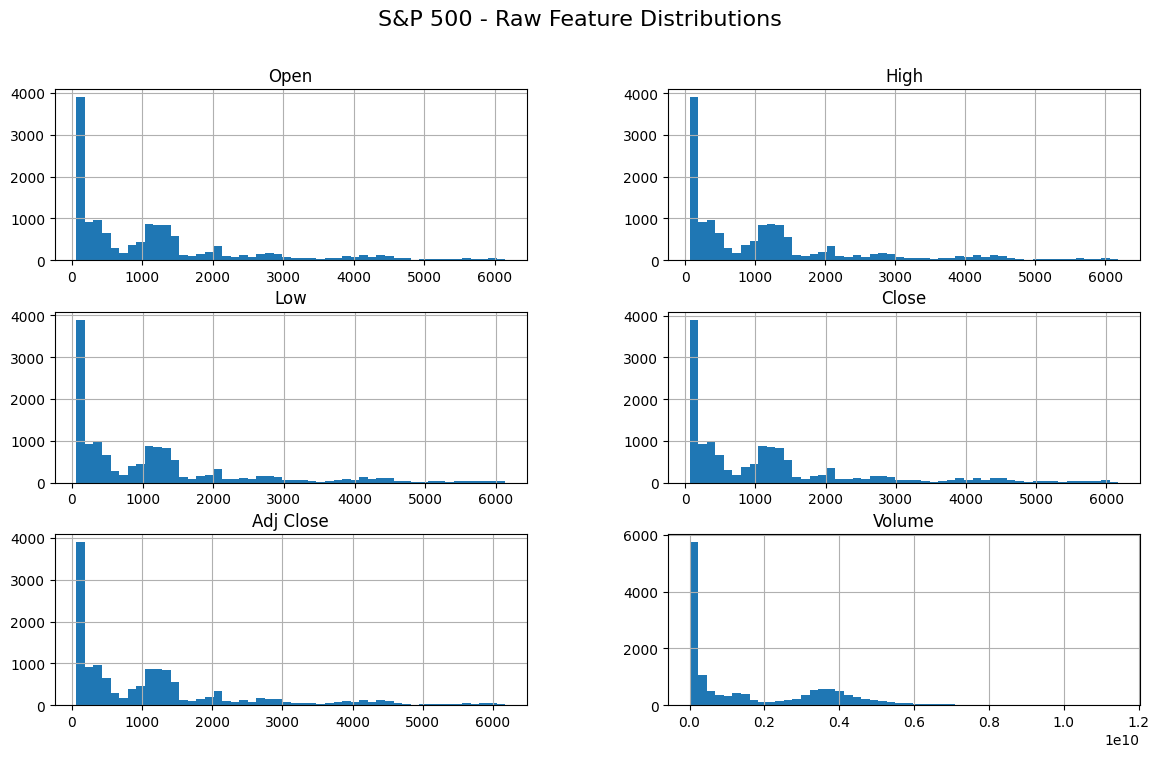

In [16]:
# Analyze raw feature distributions
numeric_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
raw_data[numeric_cols] = raw_data[numeric_cols].apply(pd.to_numeric, errors="coerce")

raw_data[numeric_cols].hist(bins=50, figsize=(14, 8))
plt.suptitle("S&P 500 - Raw Feature Distributions", fontsize=16)
plt.show()

Based on above histogram, we analysed that
the dataset is a right skewed distribution, and Price Feature (Open, High, Low, Close, Adj Close) showing same pattern.

This confirms that our raw dataset contains non-uniform distribution and potential outliers, which need to be addressed through scaling, normalization, or transformation during preprocessing to improve model performance.

Adjusted Close price closely mirroring the Close price.
To confirm this, we need to conduct further analysis.


#### Step 3.2.2: Feature Correlation Heatmap

Before creating engineered features, we generate a correlation heatmap of the raw features.
This helps us:
- Understand the baseline relationships between OHLC and Volume data.
- Identify redundant or highly correlated features that may cause multicollinearity.
- Plan which features are worth keeping and which may be dropped later.
- Provide a baseline comparison so that when we add technical indicators, we can check if they bring new information or are just duplicating what already exists.

Doing this step before feature engineering ensures that our dataset remains clean, avoids unnecessary redundancy, and supports better feature selection during modeling.

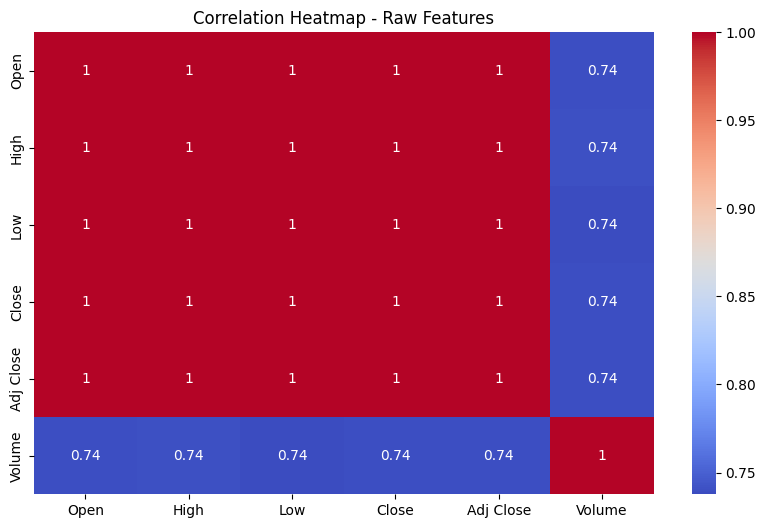

In [17]:
# Correlation Heatmap for each feature
plt.figure(figsize=(10, 6))
sns.heatmap(raw_data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Raw Features")
plt.show()

Heatmap diagram above shows almost perfect correlation (value of 1.0) among all prices related features, except for the Volume. This strong correlation among the price features needs to be considered in selecting the feature columns for model training to avoid multicollinearity associated with the regression model.

Volume shows a moderate positive correlation with price related features (0.74), indicating that the increase in trading activity (volume) may cause the increase in price, and less likely to cause the price to decrease.  


#### Step 3.2.3: Close and Adj Close Price Analysis

We want to analyse **Adj Close** and **Close**, as shown in raw feature distribution it is closedly mirror graph, to each other.

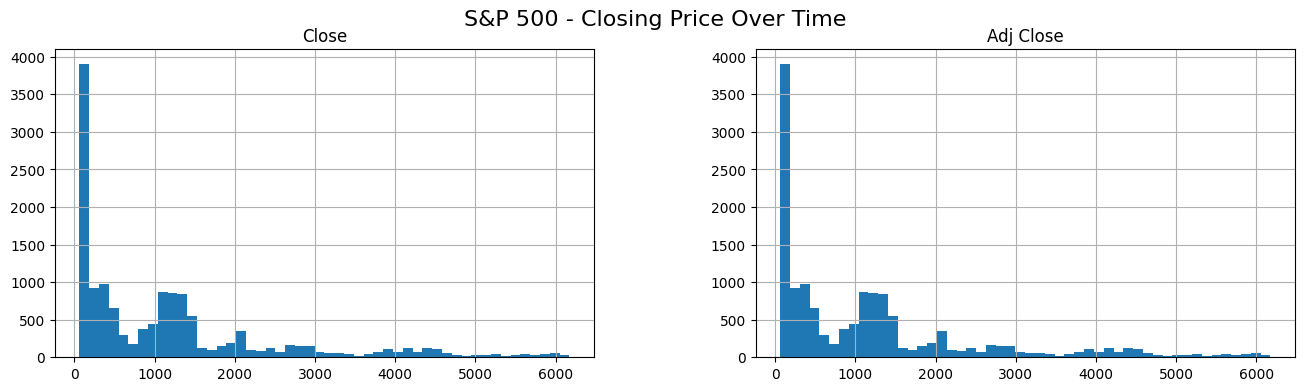

In [18]:
# Identify trends and patterns
closing_price = ["Close", "Adj Close"]
raw_data[closing_price] = raw_data[closing_price].apply(pd.to_numeric, errors="coerce")

raw_data[closing_price].hist(bins=50, figsize=(16, 4))
plt.suptitle("S&P 500 - Closing Price Over Time", fontsize=16)
plt.show()

In [19]:
# Check if any different between Adj Close and Close
closing_price_diff = raw_data["Adj Close"] - raw_data["Close"]

print("Summary statistics of Adj Close - Close:")
print(closing_price_diff.describe())

Summary statistics of Adj Close - Close:
count    13992.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64


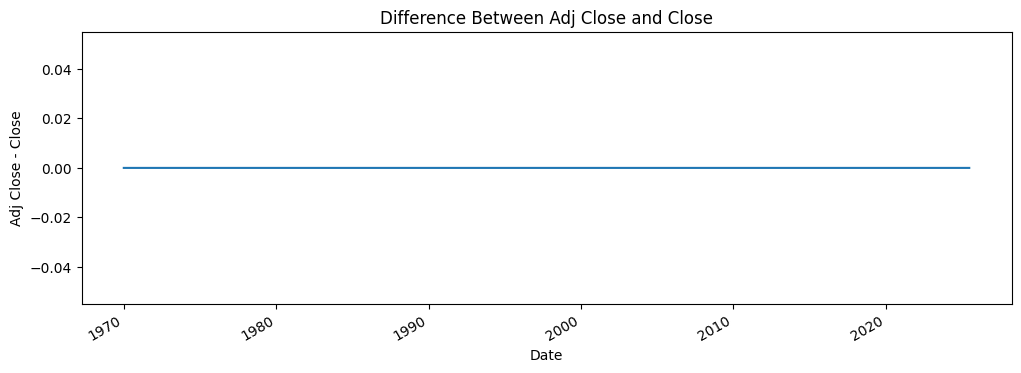

In [20]:
# Plot the difference between Adj Close and Close
closing_price_diff.plot(figsize=(12,4), title="Difference Between Adj Close and Close")
plt.ylabel("Adj Close - Close")
plt.show()

No difference found between `Close` and `Adj Close`. We can just use `Close`.

#### Step 3.2.4: Volatility and Trends Patterns

We want to analsys volatility and trends of our dataset.

**Volatility** and **trends** are essential because they capture the two most important aspects of price behavior: the magnitude of movement (risk/uncertainty) and the direction of movement (up, down, or sideways).

From our dataset, we want to understand the **Price** (focusing close price) and **Volume** volatility and trends.


First, we want to understand the "**Close**" price over the time

<Axes: title={'center': 'S&P 500 Closing Price Over Time'}, xlabel='Date'>

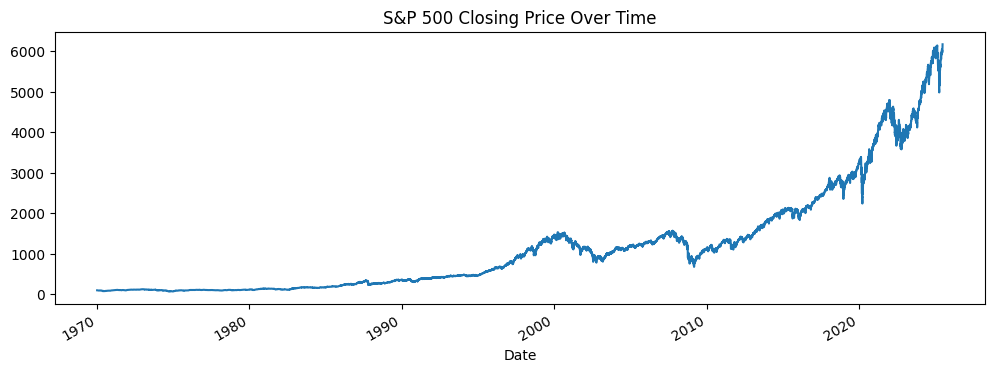

In [21]:
# Price trend plot
raw_data["Close"].plot(figsize=(12,4), title="S&P 500 Closing Price Over Time")

**Closing** Price of S&P 500 also shows a clear **long-term upward trend**. It means that their **mean** and **variance** **increase over time**, and using them directly as a feature would bias the model toward recent years. For example, an increase of 50 points in the 1970s might be highly significant, but not in recent years. For the training, we need to use **relative market price movement** instead of the raw Closing Price.


Next, we want to visualize the distribution of each price feature  and identify their central values (medians), spread (interquartile range), and outliers.

This helps us to:
1. Check data consistency across OHLC prices ‚Äî they should follow similar distributions.
2. Detect extreme values ‚Äî which may represent either true market shocks (e.g., crashes or surges) or potential anomalies in the data.
3. Understand the overall volatility and range of the index.
4. Decide whether data transformations (e.g., log scaling or normalization) are needed, and avoid redundancy if features are too similar.

By doing this, we gain insights into the historical growth of the S&P 500 and ensure the dataset is reliable before moving into feature engineering and model training.

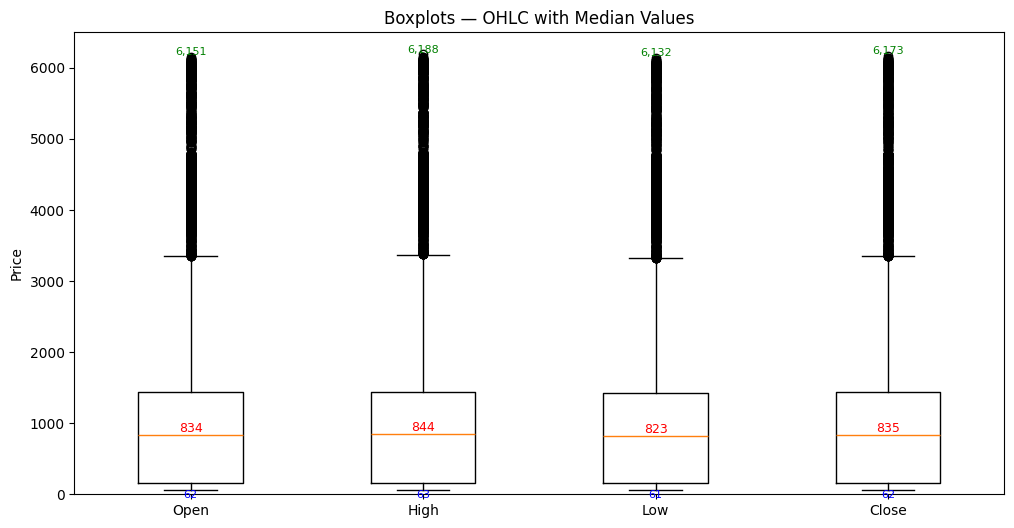

In [22]:
# Boxplot of price columns
price_cols = [c for c in ["Open", "High", "Low", "Close"] if c in raw_data.columns]
fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot([raw_data[c].dropna() for c in price_cols],
                tick_labels=price_cols, showfliers=True)

# Annotate min, median, and max for each column
for i, col in enumerate(price_cols, start=1):
    col_data = raw_data[col].dropna()
    min_val = col_data.min()
    median_val = col_data.median()
    max_val = col_data.max()

    ax.text(i, min_val, f"{min_val:,.0f}", ha="center", va="top", fontsize=8, color="blue")
    ax.text(i, median_val, f"{median_val:,.0f}", ha="center", va="bottom", fontsize=9, color="red")
    ax.text(i, max_val, f"{max_val:,.0f}", ha="center", va="bottom", fontsize=8, color="green")

ax.set_ylim(0, 6500)
ax.set_title("Boxplots ‚Äî OHLC with Median Values")
ax.set_ylabel("Price")
plt.show()

From boxplot above, we can see that most values cluster around the median, while the long whiskers and numerous outliers indicate periods of extreme price movements.

We want to understand the day-to-day price change in our dataset.

<Axes: title={'center': 'S&P 500 Percentage Closing Price Over Time'}, xlabel='Date'>

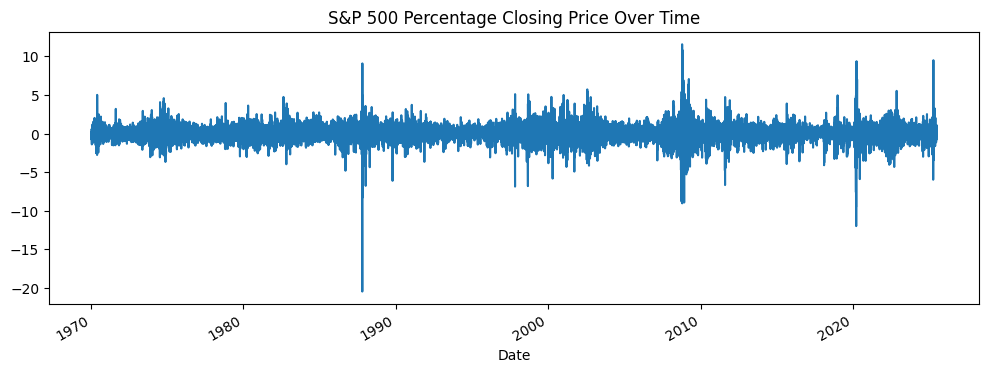

In [23]:
raw_data["Close"].pct_change(fill_method=None).mul(100).plot(figsize=(12,4), title="S&P 500 Percentage Closing Price Over Time")

As seen from above graph, most of day-to-day price change is quiet stable of the decade, with some of extreme movement due to certain event, eg: economy crisis, covid, etc.

We may want to use this (**day-to-day price change**) as feature, instead using the raw "Close" price.

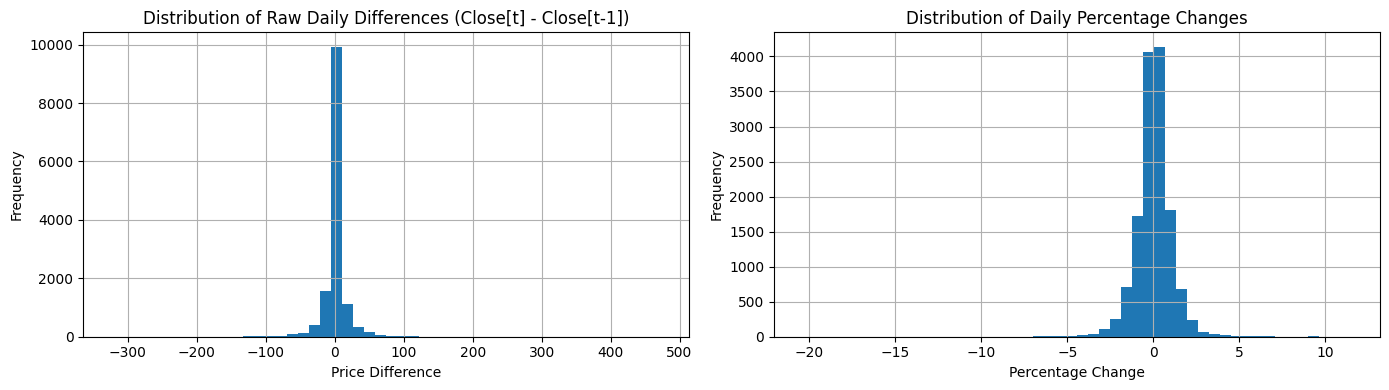

In [24]:
daily_returns = raw_data["Close"].diff()
daily_returns_pct = raw_data["Close"].pct_change(fill_method=None).mul(100)

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
daily_returns.hist(bins=50)
plt.title("Distribution of Raw Daily Differences (Close[t] - Close[t-1])")
plt.xlabel("Price Difference")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
daily_returns_pct.hist(bins=50)
plt.title("Distribution of Daily Percentage Changes")
plt.xlabel("Percentage Change")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [25]:
#check the stats of daily percentage return
daily_returns_pct.describe()

count    13991.000000
mean         0.035904
std          1.084822
min        -20.466931
25%         -0.460576
50%          0.048271
75%          0.559791
max         11.580037
Name: Close, dtype: float64

From above, the distribution is heavily centered around 0, meaning that most daily changes are small, the bulk of it fall within -100 to + 100 index points.

Also, we can see that
- On average, the S&P 500 Index increases by ~0.0359% per day.
- 50% of the days have a price range change between -0.4605% to +0.5597%.
- 25% of the days had returns worse than -0.46%. (25th percentile)
- 25% of the days had returns better than +0.56%. (75th percentile)

This is an **important** information for us to determine the **threshold value**.

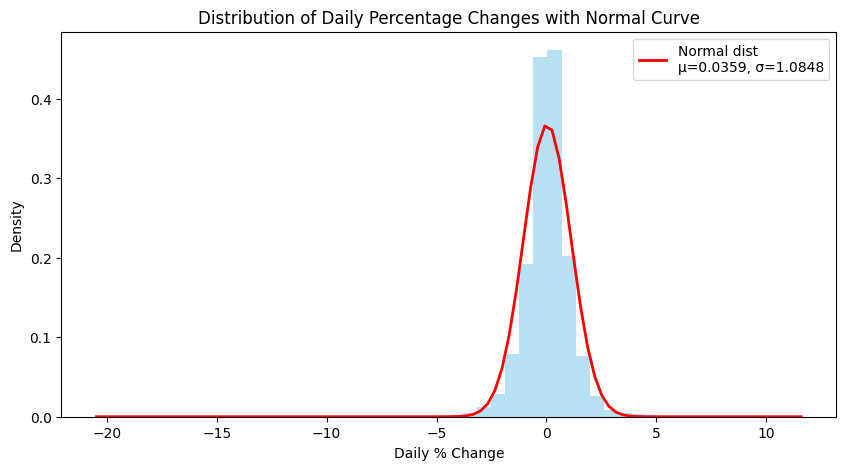

In [26]:
# Daily percentage returns
daily_returns_pct = raw_data["Close"].pct_change(fill_method=None).mul(100).dropna()

# Fit a normal distribution (mean & std from data)
mu, sigma = daily_returns_pct.mean(), daily_returns_pct.std()

# Plot histogram of daily returns
plt.figure(figsize=(10,5))
count, bins, ignored = plt.hist(daily_returns_pct, bins=50, density=True, alpha=0.6, color="skyblue")

# Overlay normal distribution curve
x = np.linspace(bins.min(), bins.max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), "r", linewidth=2, label=f"Normal dist\nŒº={mu:.4f}, œÉ={sigma:.4f}")

plt.title("Distribution of Daily Percentage Changes with Normal Curve")
plt.xlabel("Daily % Change")
plt.ylabel("Density")
plt.legend()
plt.show()

We confirmed that the day-to-day percentage change is in normal distribution.

Next, we want to identify the outliers in our dataset.

In [27]:
#Identify Extreme Price Moves (>10% daily change)
extreme_moves = raw_data[raw_data["Close"].pct_change(fill_method=None).mul(100).abs() > 10]
print(extreme_moves)

              Adj Close        Close         High          Low         Open  \
Date                                                                          
1987-10-19   224.839996   224.839996   282.700012   224.830002   282.700012   
2008-10-13  1003.349976  1003.349976  1006.929993   912.750000   912.750000   
2008-10-28   940.510010   940.510010   940.510010   845.270020   848.919983   
2020-03-16  2386.129883  2386.129883  2562.979980  2380.939941  2508.590088   

                  Volume  
Date                      
1987-10-19  6.043000e+08  
2008-10-13  7.263370e+09  
2008-10-28  7.096950e+09  
2020-03-16  7.805450e+09  


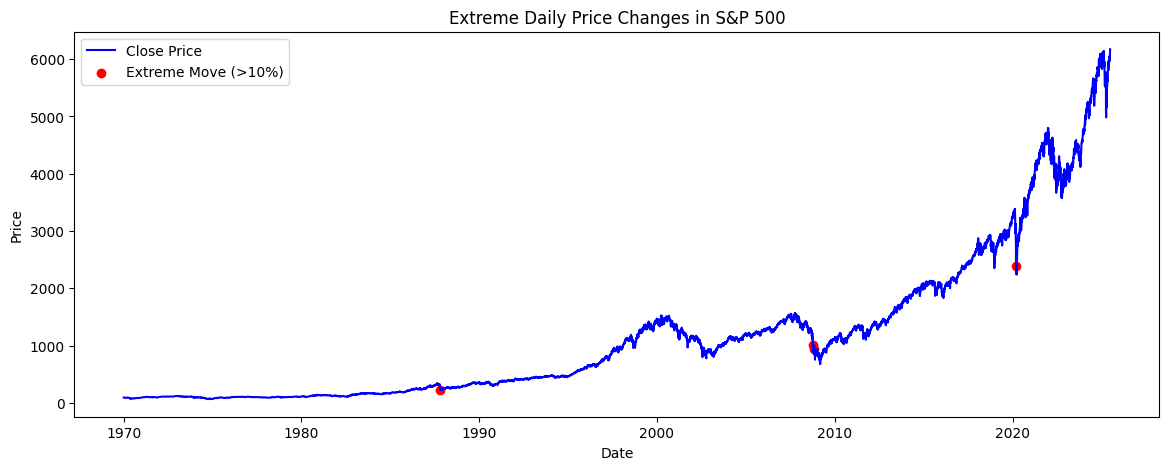

In [28]:
plt.figure(figsize=(14,5))
plt.plot(raw_data.index, raw_data["Close"], label="Close Price", color="blue")
plt.scatter(extreme_moves.index, extreme_moves["Close"], color="red", label="Extreme Move (>10%)")
plt.title("Extreme Daily Price Changes in S&P 500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

The above chart shows that there were only a few instances of extreme price movement throughout the entire dataset period. This means, we do not need to exclude any outliers in our dataset.

Next, we calculate and plot rolling volatility of the S&P 500 index.
Volatility is measured as the rolling standard deviation of daily percentage changes in the closing price.

By plotting rolling volatility, we can:
1. Identify periods of high volatility (e.g., market crashes or crises).
2. Identify stable, low-volatility periods (e.g., steady growth phases).
3. Capture time-varying patterns that can be useful features for our machine learning model.

This analysis is important because volatility is a key financial indicator that often influences market movements and can improve our prediction of Up/Down/Sideways trends.

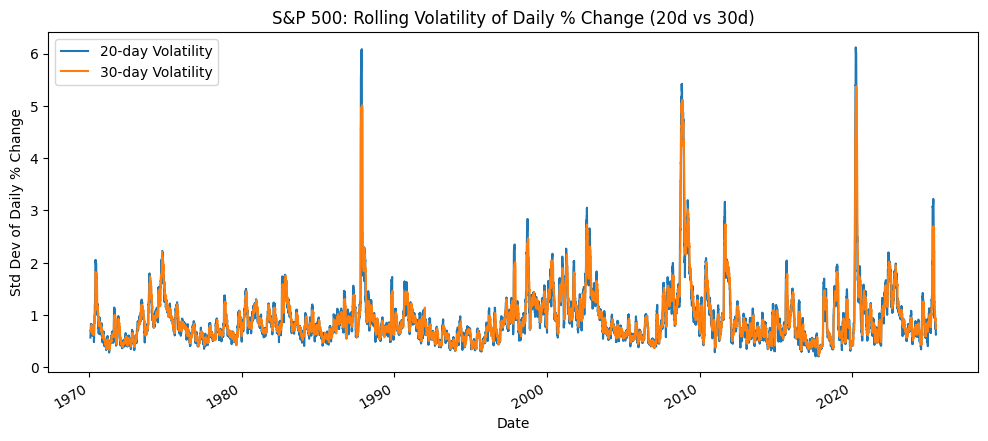

In [29]:
# Daily % change (returns)
ret_pct = raw_data["Close"].pct_change(fill_method=None).mul(100)

# Rolling volatility of daily % change
volatility = pd.DataFrame(index=raw_data.index)
volatility["Volatility_20d"] = ret_pct.rolling(window=20, min_periods=20).std()
volatility["Volatility_30d"] = ret_pct.rolling(window=30, min_periods=30).std()

# Plot
ax = volatility[["Volatility_20d", "Volatility_30d"]].plot(
    figsize=(12, 5), title="S&P 500: Rolling Volatility of Daily % Change (20d vs 30d)"
)
ax.set_ylabel("Std Dev of Daily % Change")
ax.legend(["20-day Volatility", "30-day Volatility"])


<Axes: title={'center': 'S&P 500 Volume Over Time'}, xlabel='Date'>

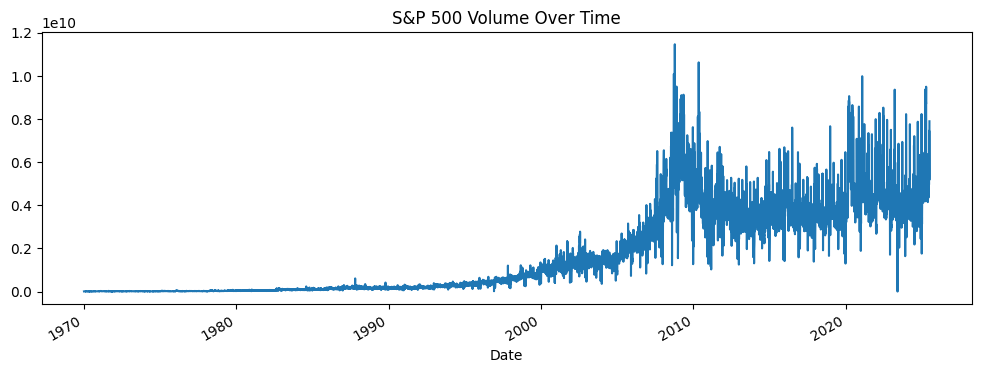

In [30]:
# Volume trend plot
raw_data["Volume"].plot(figsize=(12,4), title="S&P 500 Volume Over Time")

Similar to "Close" price, **Volume** showed the scale of trading volume change dramatically over decades.

It had relatively low and stable volumes in the 1970s-1990s, followed by significant growth from the 2000s onwards. This non-stationary behavior means that using raw volume directly as a feature would bias the model towards recent years, where the volumes are naturally larger.

We need to apply **log transformation** or **normalize** volume to make it comparable across the time periods.


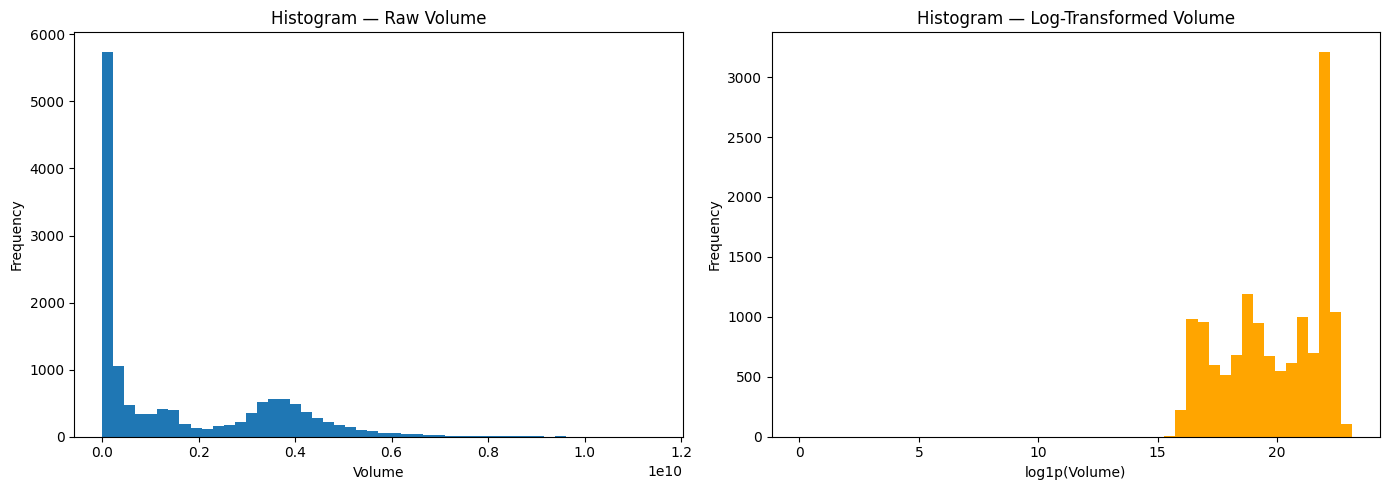

In [31]:
# Raw and log-transformed volume
raw_volume = raw_data["Volume"].dropna()
log_volume = np.log1p(raw_volume)   # log(1+x) to avoid log(0)

# Side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw volume histogram
axes[0].hist(raw_volume, bins=50)
axes[0].set_title("Histogram ‚Äî Raw Volume")
axes[0].set_xlabel("Volume")
axes[0].set_ylabel("Frequency")

# Log-transformed volume histogram
axes[1].hist(log_volume, bins=50, color="orange")
axes[1].set_title("Histogram ‚Äî Log-Transformed Volume")
axes[1].set_xlabel("log1p(Volume)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

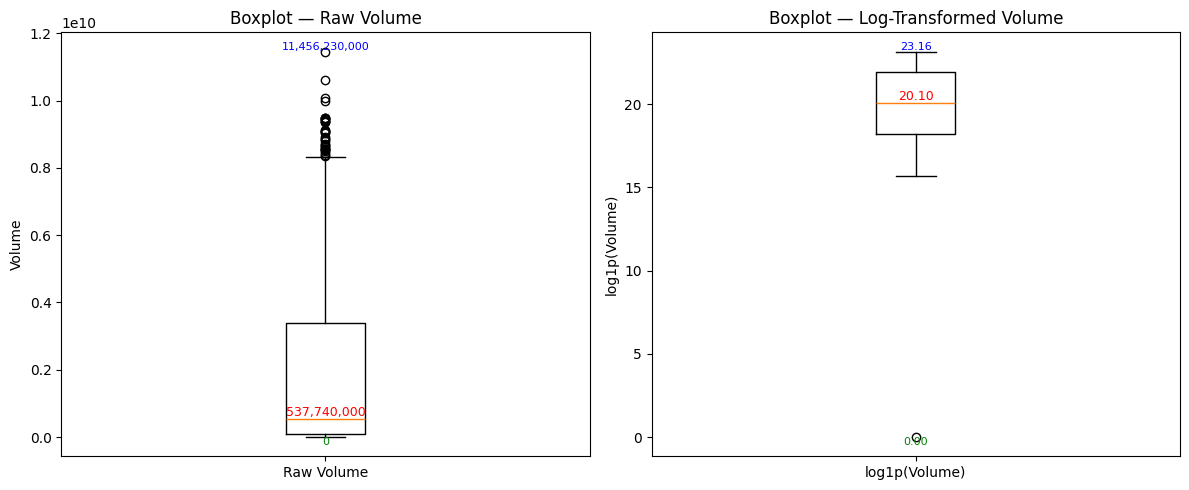

In [32]:
# Boxplots with annotated min, median, max
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw volume boxplot
bp_raw = axes[0].boxplot(raw_volume, tick_labels=["Raw Volume"], showfliers=True)
axes[0].set_title("Boxplot ‚Äî Raw Volume")
axes[0].set_ylabel("Volume")

# Annotate values
min_val = raw_volume.min()
median_val = raw_volume.median()
max_val = raw_volume.max()
axes[0].text(1, min_val, f"{min_val:,.0f}", ha="center", va="top", fontsize=8, color="green")
axes[0].text(1, median_val, f"{median_val:,.0f}", ha="center", va="bottom", fontsize=9, color="red")
axes[0].text(1, max_val, f"{max_val:,.0f}", ha="center", va="bottom", fontsize=8, color="blue")

# Log-transformed volume boxplot
bp_log = axes[1].boxplot(log_volume, tick_labels=["log1p(Volume)"], showfliers=True)
axes[1].set_title("Boxplot ‚Äî Log-Transformed Volume")
axes[1].set_ylabel("log1p(Volume)")

# Annotate values
min_val_log = log_volume.min()
median_val_log = log_volume.median()
max_val_log = log_volume.max()
axes[1].text(1, min_val_log, f"{min_val_log:.2f}", ha="center", va="top", fontsize=8, color="green")
axes[1].text(1, median_val_log, f"{median_val_log:.2f}", ha="center", va="bottom", fontsize=9, color="red")
axes[1].text(1, max_val_log, f"{max_val_log:.2f}", ha="center", va="bottom", fontsize=8, color="blue")

fig.tight_layout()
fig.show()

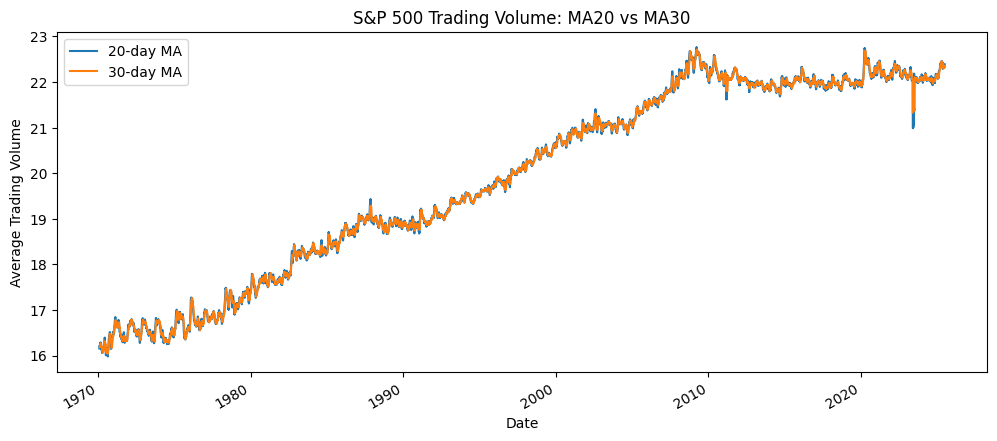

In [34]:
# Calculate 20-day and 30-day moving averages of Volume
volume = raw_data.copy()
raw_volume = volume["Volume"].dropna()
volume['log_volume'] = np.log1p(raw_volume)
volume["Volume_MA20"] = volume['log_volume'].rolling(window=20).mean()
volume["Volume_MA30"] = volume['log_volume'].rolling(window=30).mean()

# Plot both on the same chart
ax = volume[["Volume_MA20", "Volume_MA30"]].plot(figsize=(12,5),
                                                   title="S&P 500 Trading Volume: MA20 vs MA30")
ax.set_ylabel("Average Trading Volume")
ax.legend(["20-day MA", "30-day MA"])

The 20-day and 30-day moving averages of trading volume (after log normalization) show a steady rise from the 1970s to around 2010, followed by stabilization with minor spikes.

Log scaling smooths extreme surges, making long-term growth and trends clearer.

### Step 3.2: Data Cleaning

In [ ]:
# Data Cleaning: Reset index to ensure Date is a column
raw_data.reset_index(inplace=True)

In [ ]:
# Data Cleaning: Remove rows with missing Close
clean_data = raw_data.dropna(subset=["Close"]).copy()

In [ ]:
# Data Cleaning: Missing Values Handling

# Check missing values first
missing_summary = clean_data.isnull().sum()
print("Missing values before cleaning:\n", missing_summary[missing_summary > 0])

# Forward fill for time-series continuity
clean_data.ffill(inplace=True)

# If still missing values remain (e.g., at the very start), backfill
clean_data.bfill(inplace=True)

# Final check
print("\nMissing values after cleaning:", clean_data.isnull().sum().sum())

Missing values before cleaning:
 Series([], dtype: int64)

Missing values after cleaning: 0


In [ ]:
# Data Cleaning: Remove non-trading days ===

# Before removal
print(f"Rows before filtering: {clean_data.shape[0]}")
zero_volume_days = clean_data[clean_data["Volume"] == 0]
print(f"Non-trading days found: {zero_volume_days.shape[0]}")

# Remove rows where trading volume is zero
clean_data = clean_data[clean_data["Volume"] > 0].copy()

# After removal
print(f"Rows after filtering: {clean_data.shape[0]}")

Rows before filtering: 13992
Non-trading days found: 1
Rows after filtering: 13991


In [ ]:
# Data Cleaning:  Ensure date order is ascending ===
clean_data.sort_values("Date", inplace=True)

In [ ]:
# Data Cleaning: Remove duplicate data ===
clean_data = clean_data.drop_duplicates(subset=["Date"], keep="first").reset_index(drop=True)

In [ ]:
# Data Cleaning:  Reset index again for clean integer index ===
clean_data.reset_index(drop=True, inplace=True)

In [ ]:
# Data Cleaning:  Final Check ===
print("Final dataset shape:", clean_data.shape)
print("Missing values:", clean_data.isnull().sum().sum())
print("Date range:", clean_data["Date"].min(), "to", clean_data["Date"].max())

Final dataset shape: (13991, 7)
Missing values: 0
Date range: 1970-01-02 00:00:00 to 2025-06-27 00:00:00


### Step 3.3: Feature Engineering - Label Construction

To convert the problem into a classification task, we created a new column movement_label, which is  our target variable for classification.  

We calculated the value of  movement_label  by comparing percentage change in closing price between the current day (t) and the next trading day (t+1).

In [ ]:
# Function to classify movement
def classify_movement(pct, threshold):
    if pd.isna(pct):
        return np.nan
    if pct >= threshold:
        return "Up"
    elif pct <= -threshold:
        return "Down"
    else:
        return "Sideway"

In [ ]:
# Calculate percentage change between today's and tomorrow's close
clean_data["Pct_Change_t"] = clean_data["Close"].pct_change(fill_method=None).mul(100)

In [ ]:
clean_data.head()

Date  Adj Close      Close       High        Low       Open  \
0 1970-01-02  93.000000  93.000000  93.540001  91.790001  92.059998   
1 1970-01-05  93.459999  93.459999  94.250000  92.529999  93.000000   
2 1970-01-06  92.820000  92.820000  93.809998  92.129997  93.459999   
3 1970-01-07  92.629997  92.629997  93.379997  91.930000  92.820000   
4 1970-01-08  92.680000  92.680000  93.470001  91.989998  92.629997   

       Volume  Pct_Change_t  
0   8050000.0           NaN  
1  11490000.0      0.494623  
2  11460000.0     -0.684784  
3  10010000.0     -0.204700  
4  10670000.0      0.053981

In [ ]:
clean_data.tail()

Date    Adj Close        Close         High          Low  \
13986 2025-06-23  6025.169922  6025.169922  6028.770020  5943.229980   
13987 2025-06-24  6092.180176  6092.180176  6101.759766  6059.250000   
13988 2025-06-25  6092.160156  6092.160156  6108.509766  6080.089844   
13989 2025-06-26  6141.020020  6141.020020  6146.520020  6107.270020   
13990 2025-06-27  6173.069824  6173.069824  6187.680176  6132.350098   

              Open        Volume  Pct_Change_t  
13986  5969.669922  5.597000e+09      0.960650  
13987  6061.209961  5.443690e+09      1.112172  
13988  6104.229980  5.171110e+09     -0.000329  
13989  6112.089844  5.308140e+09      0.802012  
13990  6150.700195  7.889350e+09      0.521897

In [ ]:
clean_data["Pct_Change_t1"] = clean_data["Pct_Change_t"].shift(-1)

In [ ]:
clean_data.head()

Date  Adj Close      Close       High        Low       Open  \
0 1970-01-02  93.000000  93.000000  93.540001  91.790001  92.059998   
1 1970-01-05  93.459999  93.459999  94.250000  92.529999  93.000000   
2 1970-01-06  92.820000  92.820000  93.809998  92.129997  93.459999   
3 1970-01-07  92.629997  92.629997  93.379997  91.930000  92.820000   
4 1970-01-08  92.680000  92.680000  93.470001  91.989998  92.629997   

       Volume  Pct_Change_t  Pct_Change_t1  
0   8050000.0           NaN       0.494623  
1  11490000.0      0.494623      -0.684784  
2  11460000.0     -0.684784      -0.204700  
3  10010000.0     -0.204700       0.053981  
4  10670000.0      0.053981      -0.302113

In [ ]:
clean_data.tail()

Date    Adj Close        Close         High          Low  \
13986 2025-06-23  6025.169922  6025.169922  6028.770020  5943.229980   
13987 2025-06-24  6092.180176  6092.180176  6101.759766  6059.250000   
13988 2025-06-25  6092.160156  6092.160156  6108.509766  6080.089844   
13989 2025-06-26  6141.020020  6141.020020  6146.520020  6107.270020   
13990 2025-06-27  6173.069824  6173.069824  6187.680176  6132.350098   

              Open        Volume  Pct_Change_t  Pct_Change_t1  
13986  5969.669922  5.597000e+09      0.960650       1.112172  
13987  6061.209961  5.443690e+09      1.112172      -0.000329  
13988  6104.229980  5.171110e+09     -0.000329       0.802012  
13989  6112.089844  5.308140e+09      0.802012       0.521897  
13990  6150.700195  7.889350e+09      0.521897            NaN

In [ ]:
# Apply classification
clean_data["movement_label_05"] = clean_data["Pct_Change_t1"].apply(classify_movement, args=(INITIAL_THRESHOLD,))
clean_data["movement_label_03"] = clean_data["Pct_Change_t1"].apply(classify_movement, args=(ADJUSTED_THRESHOLD,))

In [ ]:
clean_data.head()

Date  Adj Close      Close       High        Low       Open  \
0 1970-01-02  93.000000  93.000000  93.540001  91.790001  92.059998   
1 1970-01-05  93.459999  93.459999  94.250000  92.529999  93.000000   
2 1970-01-06  92.820000  92.820000  93.809998  92.129997  93.459999   
3 1970-01-07  92.629997  92.629997  93.379997  91.930000  92.820000   
4 1970-01-08  92.680000  92.680000  93.470001  91.989998  92.629997   

       Volume  Pct_Change_t  Pct_Change_t1 movement_label_05 movement_label_03  
0   8050000.0           NaN       0.494623           Sideway                Up  
1  11490000.0      0.494623      -0.684784              Down              Down  
2  11460000.0     -0.684784      -0.204700           Sideway           Sideway  
3  10010000.0     -0.204700       0.053981           Sideway           Sideway  
4  10670000.0      0.053981      -0.302113           Sideway              Down

In [ ]:
clean_data.tail()

Date    Adj Close        Close         High          Low  \
13986 2025-06-23  6025.169922  6025.169922  6028.770020  5943.229980   
13987 2025-06-24  6092.180176  6092.180176  6101.759766  6059.250000   
13988 2025-06-25  6092.160156  6092.160156  6108.509766  6080.089844   
13989 2025-06-26  6141.020020  6141.020020  6146.520020  6107.270020   
13990 2025-06-27  6173.069824  6173.069824  6187.680176  6132.350098   

              Open        Volume  Pct_Change_t  Pct_Change_t1  \
13986  5969.669922  5.597000e+09      0.960650       1.112172   
13987  6061.209961  5.443690e+09      1.112172      -0.000329   
13988  6104.229980  5.171110e+09     -0.000329       0.802012   
13989  6112.089844  5.308140e+09      0.802012       0.521897   
13990  6150.700195  7.889350e+09      0.521897            NaN   

      movement_label_05 movement_label_03  
13986                Up                Up  
13987           Sideway           Sideway  
13988                Up                Up  
13989                Up                Up  
13990               NaN               NaN

In [ ]:
# Drop any rows with NaN
# Pct_Change_t (first row will be Nan because has no yesterday)
# movement_label (last row will be NaN because shift(-1) has no tomorrow)
clean_data.dropna(subset=["Pct_Change_t","movement_label_05", "movement_label_03"], inplace=True)

In [ ]:
clean_data.head()

Date  Adj Close      Close       High        Low       Open  \
1 1970-01-05  93.459999  93.459999  94.250000  92.529999  93.000000   
2 1970-01-06  92.820000  92.820000  93.809998  92.129997  93.459999   
3 1970-01-07  92.629997  92.629997  93.379997  91.930000  92.820000   
4 1970-01-08  92.680000  92.680000  93.470001  91.989998  92.629997   
5 1970-01-09  92.400002  92.400002  93.250000  91.820000  92.680000   

       Volume  Pct_Change_t  Pct_Change_t1 movement_label_05 movement_label_03  
1  11490000.0      0.494623      -0.684784              Down              Down  
2  11460000.0     -0.684784      -0.204700           Sideway           Sideway  
3  10010000.0     -0.204700       0.053981           Sideway           Sideway  
4  10670000.0      0.053981      -0.302113           Sideway              Down  
5   9380000.0     -0.302113      -0.757581              Down              Down

In [ ]:
clean_data.tail()

Date    Adj Close        Close         High          Low  \
13985 2025-06-20  5967.839844  5967.839844  6018.200195  5952.560059   
13986 2025-06-23  6025.169922  6025.169922  6028.770020  5943.229980   
13987 2025-06-24  6092.180176  6092.180176  6101.759766  6059.250000   
13988 2025-06-25  6092.160156  6092.160156  6108.509766  6080.089844   
13989 2025-06-26  6141.020020  6141.020020  6146.520020  6107.270020   

              Open        Volume  Pct_Change_t  Pct_Change_t1  \
13985  5999.669922  7.451500e+09     -0.217866       0.960650   
13986  5969.669922  5.597000e+09      0.960650       1.112172   
13987  6061.209961  5.443690e+09      1.112172      -0.000329   
13988  6104.229980  5.171110e+09     -0.000329       0.802012   
13989  6112.089844  5.308140e+09      0.802012       0.521897   

      movement_label_05 movement_label_03  
13985                Up                Up  
13986                Up                Up  
13987           Sideway           Sideway  
13988                Up                Up  
13989                Up                Up

In [ ]:
# Check class distribution 0.5%
class_counts_05 = clean_data["movement_label_05"].value_counts()
class_percents_05 = clean_data["movement_label_05"].value_counts(normalize=True) * 100

print("Threshold 0.5%  - Class distribution:\n", class_counts_05)
print("\nThreshold 0.5%  - Class distribution (%):\n", class_percents_05)

Threshold 0.5%  - Class distribution:
 movement_label_05
Sideway    6857
Up         3809
Down       3323
Name: count, dtype: int64

Threshold 0.5%  - Class distribution (%):
 movement_label_05
Sideway    49.017085
Up         27.228537
Down       23.754378
Name: proportion, dtype: float64


In [ ]:
# Check class distribution 0.3%
class_counts_03 = clean_data["movement_label_03"].value_counts()
class_percents_03 = clean_data["movement_label_03"].value_counts(normalize=True) * 100

print("Threshold 0.3%  - Class distribution:\n", class_counts_03)
print("\nThreshold 0.3%  - Class distribution (%):\n", class_percents_03)

Threshold 0.3%  - Class distribution:
 movement_label_03
Up         5037
Sideway    4603
Down       4349
Name: count, dtype: int64

Threshold 0.3%  - Class distribution (%):
 movement_label_03
Up         36.006863
Sideway    32.904425
Down       31.088713
Name: proportion, dtype: float64


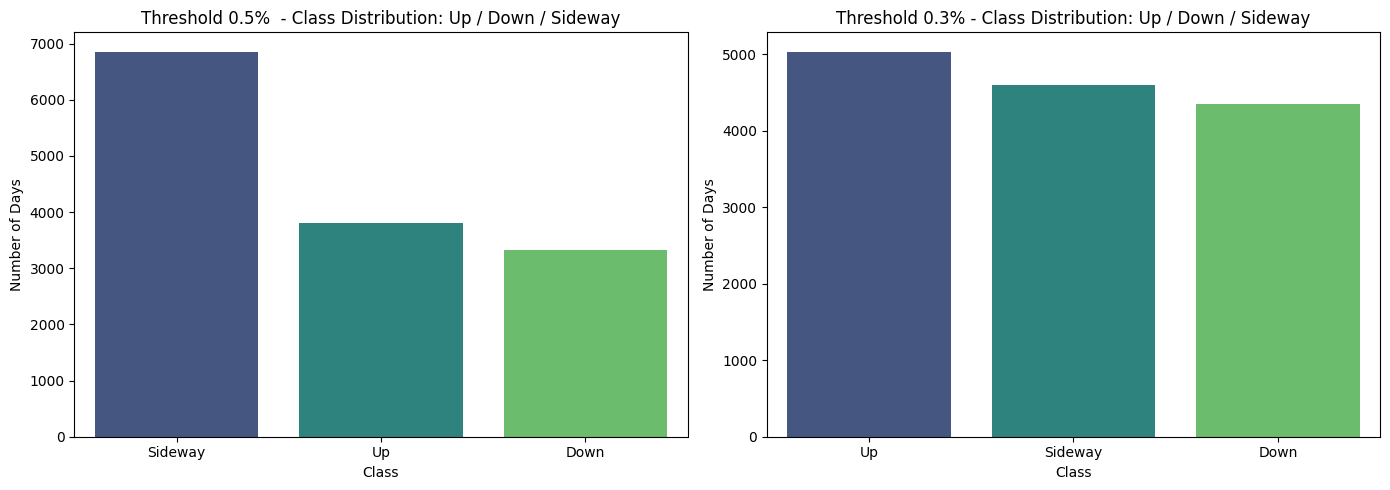

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot class distribution 0.5%
sns.barplot(x=class_counts_05.index, y=class_counts_05.values,palette="viridis", hue=class_percents_05.index, ax=axes[0])
axes[0].set_xlabel("Movement Label")
axes[0].set_ylabel("Count")
axes[0].set_title("Threshold 0.5%  - Class Distribution: Up / Down / Sideway")
axes[0].set_ylabel("Number of Days")
axes[0].set_xlabel("Class")

# Plot class distribution 0.3%
sns.barplot(x=class_counts_03.index, y=class_counts_03.values, palette="viridis", hue=class_percents_03.index, ax=axes[1] )
axes[1].set_xlabel("Movement Label")
axes[1].set_ylabel("Count")
axes[1].set_title("Threshold 0.3% - Class Distribution: Up / Down / Sideway")
axes[1].set_ylabel("Number of Days")
axes[1].set_xlabel("Class")

plt.tight_layout()
plt.show()

With the threshold of +/- 0.5%, the dataset gave an imbalance distribution of the target variable (majority class is Sideway, about +/- 60% of the dataset).


We tried to modify our threshold definition to +/-0.3%, and we found fewer days get classified as ‚ÄúSideways.‚Äù, make more balanced the distribution of classes, making training more effective (avoiding a classifier that just predicts ‚ÄúSideways‚Äù most of the time).

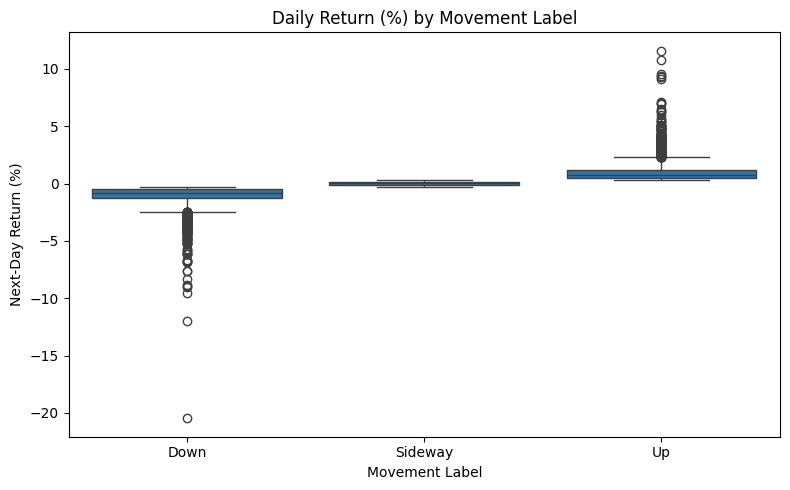

In [ ]:
# Drop the last NaN-return row (from shift(-1))
df_ret = clean_data.dropna(subset=["Pct_Change_t","Pct_Change_t1", "movement_label_03"]).copy()

order = ["Down", "Sideway", "Up"]
fig, ax = plt.subplots(figsize=(8, 5))
if "sns" in globals():
    sns.boxplot(data=df_ret, x="movement_label_03", y="Pct_Change_t1",
                order=order, ax=ax, showfliers=True)
else:
    # Fallback to matplotlib
    groups = [df_ret.loc[df_ret["movement_label_03"] == k, "Pct_Change_t1"] for k in order]
    ax.boxplot(groups, labels=order, showfliers=True)

ax.set_title("Daily Return (%) by Movement Label")
ax.set_xlabel("Movement Label")
ax.set_ylabel("Next-Day Return (%)")
fig.tight_layout()
fig.savefig("fig_boxplot_returns_by_label.png")
plt.show()

The boxplot shows that Sideway movements cluster tightly around zero returns, while Up and Down labels have wider spreads with more extreme outliers, reflecting stronger price swings in trending markets compared to stable periods.

### Step 3.4: Feature Engineering - Technical Ididcators

In [ ]:
# 1. Moving Averages (MA5, MA10, MA20)
clean_data["MA5"] = clean_data["Close"].rolling(window=5).mean()
clean_data["MA10"] = clean_data["Close"].rolling(window=10).mean()
clean_data["MA20"] = clean_data["Close"].rolling(window=20).mean()

In [ ]:
# 2. Relative Strength Index (RSI)
clean_data["RSI"] = ta.momentum.RSIIndicator(close=clean_data["Close"], window=14).rsi()

In [ ]:
# 3. MACD and MACD Signal
macd_indicator = ta.trend.MACD(close=clean_data["Close"])
clean_data["MACD"] = macd_indicator.macd()
clean_data["MACD_signal"] = macd_indicator.macd_signal()

In [ ]:
# 4. Exponential Moving Averages (EMA10, EMA20)
clean_data["EMA10"] = ta.trend.EMAIndicator(close=clean_data["Close"], window=10).ema_indicator()
clean_data["EMA20"] = ta.trend.EMAIndicator(close=clean_data["Close"], window=20).ema_indicator()

In [ ]:
# 5. Bollinger Band Width
bb_indicator = ta.volatility.BollingerBands(close=clean_data["Close"], window=20)
clean_data["BB_WIDTH"] = bb_indicator.bollinger_wband()

In [ ]:
# 6. Average True Range (ATR)
atr_indicator = ta.volatility.AverageTrueRange(
    high=clean_data["High"],
    low=clean_data["Low"],
    close=clean_data["Close"],
    window=14
)
clean_data["ATR"] = atr_indicator.average_true_range()

In [ ]:
# 7. Stochastic Oscillator (%K and %D)
stoch_k = ta.momentum.StochasticOscillator(
    high=clean_data["High"],
    low=clean_data["Low"],
    close=clean_data["Close"],
    window=14,
    smooth_window=3
)
clean_data["STOCH_K"] = stoch_k.stoch()
clean_data["STOCH_D"] = stoch_k.stoch_signal()

In [ ]:
# Drop NaN values from the start due to rolling calculations
clean_data.dropna(inplace=True)

# Check final shape
print("Dataset shape after adding indicators:", clean_data.shape)

Dataset shape after adding indicators: (13956, 23)


### Step 3.5: Other Feature Engineering

Referring to our initial analysis of our raw dataset, we have identified log transformation or normalisation is required, such as on Volume and Closing Price. Hence, we introduce a new features, such as:
- Log Volume
    - Normalising the volume, due to increasing trading volume over the decade, may impact model learning.
-20D Moving Average Volume
    - Daily volume can spike, to capture moving averages over 20 days.
- Price Change Percentage
    - Normalising the Closing Price, due to increasing price over the decade
    - To avoid leakage, the percentage is calculated with between (Close(t) - Close(t-1)) / Close(t), a slightly different formula used to assign the movement label.
- Daily Range
    - To detect intraday sentiment / fluctuation (High - Low)
- Close to Open Gap
    - To detect overnight sentiment / fluctuation (Today Close and Tomorrow Open)


In [ ]:
# Log‚Äëtransformed Volume  ‚Äî‚Äî reduces extreme skew
clean_data["LOG_VOLUME"] = np.log1p(raw_data["Volume"].dropna())

In [ ]:
# 20‚Äëday Moving Average of Volume ‚Äî‚Äî trend in market participation
clean_data["MA_VOLUME_20"] = clean_data["LOG_VOLUME"].rolling(window=20).mean()

In [ ]:
# Daily Range (intraday volatility proxy)
clean_data["DAILY_RANGE"] = clean_data["High"] - clean_data["Low"]

In [ ]:
# Close‚Äëto‚ÄëOpen Gap (overnight sentiment)
clean_data["CLOSE_TO_OPEN_GAP"] = (clean_data["Open"] - clean_data["Close"].shift(1)) / clean_data["Close"].shift(1)

In [ ]:
# Drop movement_label_05,  Rename movement_label_03 ‚Üí movement_label
clean_data = (
    clean_data
    .drop(columns=["Adj Close", "Volume", "movement_label_05"], errors="ignore")
    .rename(columns={"movement_label_03": "movement_label"})
)

In [ ]:
# add movement label - numeric
label_map = {"Down": 0, "Sideway": 1, "Up": 2}
clean_data["movement_label_num"] = clean_data["movement_label"].map(label_map)

In [ ]:
clean_data.isnull().sum()

Date                   0
Close                  0
High                   0
Low                    0
Open                   0
Pct_Change_t           0
Pct_Change_t1          0
movement_label         0
MA5                    0
MA10                   0
MA20                   0
RSI                    0
MACD                   0
MACD_signal            0
EMA10                  0
EMA20                  0
BB_WIDTH               0
ATR                    0
STOCH_K                0
STOCH_D                0
LOG_VOLUME             0
MA_VOLUME_20          19
DAILY_RANGE            0
CLOSE_TO_OPEN_GAP      1
movement_label_num     0
dtype: int64

In [ ]:
clean_data.ffill(inplace=True)
clean_data.bfill(inplace=True)

In [ ]:
clean_data.isnull().sum()

Date                  0
Close                 0
High                  0
Low                   0
Open                  0
Pct_Change_t          0
Pct_Change_t1         0
movement_label        0
MA5                   0
MA10                  0
MA20                  0
RSI                   0
MACD                  0
MACD_signal           0
EMA10                 0
EMA20                 0
BB_WIDTH              0
ATR                   0
STOCH_K               0
STOCH_D               0
LOG_VOLUME            0
MA_VOLUME_20          0
DAILY_RANGE           0
CLOSE_TO_OPEN_GAP     0
movement_label_num    0
dtype: int64

In [ ]:
print(clean_data.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Pct_Change_t', 'Pct_Change_t1',
       'movement_label', 'MA5', 'MA10', 'MA20', 'RSI', 'MACD', 'MACD_signal',
       'EMA10', 'EMA20', 'BB_WIDTH', 'ATR', 'STOCH_K', 'STOCH_D', 'LOG_VOLUME',
       'MA_VOLUME_20', 'DAILY_RANGE', 'CLOSE_TO_OPEN_GAP',
       'movement_label_num'],
      dtype='object')


In [ ]:
clean_data.isnull().sum()

Date                  0
Close                 0
High                  0
Low                   0
Open                  0
Pct_Change_t          0
Pct_Change_t1         0
movement_label        0
MA5                   0
MA10                  0
MA20                  0
RSI                   0
MACD                  0
MACD_signal           0
EMA10                 0
EMA20                 0
BB_WIDTH              0
ATR                   0
STOCH_K               0
STOCH_D               0
LOG_VOLUME            0
MA_VOLUME_20          0
DAILY_RANGE           0
CLOSE_TO_OPEN_GAP     0
movement_label_num    0
dtype: int64

### Step 3.6: Second Exploratory Data Analysis

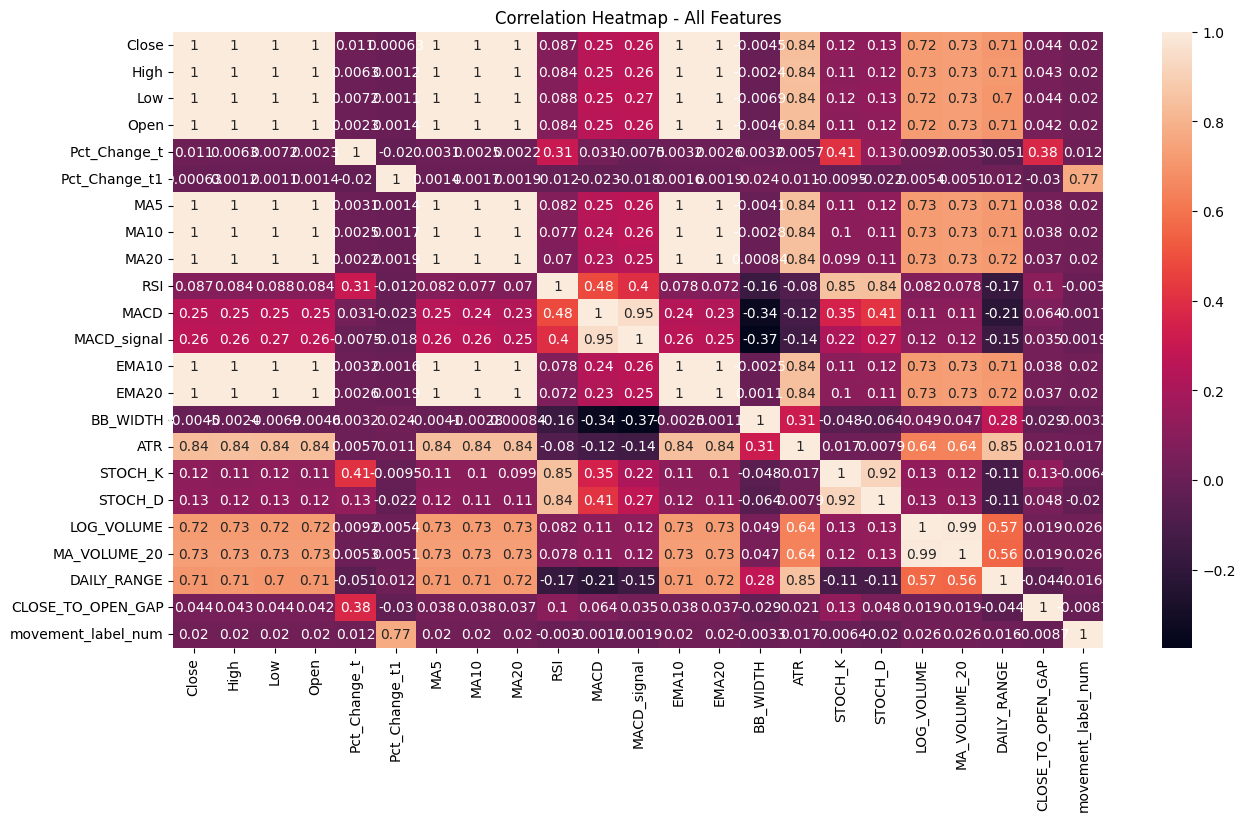

In [ ]:
# Correlation Matrics
plt.subplots(figsize=(15, 8))
corr = clean_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.title("Correlation Heatmap - All Features")
plt.show()

**Strong Correlation** are shown between **MA5, MA10, and MA20; EMA10 and EMA20.**

Similar correlations between **Stoch_D** and **Stoch_K** indicators (0.92), and same for **MACD** and **MACD_Signal** (0.95) indicators.

Similar to earlier EDA on raw data, we may need to consider dropping these features because they are identical or highly correlated. This redundancy can lead to **multicollinearity** problems in our Logistic Regression model, making coefficients unstable and less interpretable.

**BB_width** is less correlated with most other features (low absolute values). This suggests it could provide unique information for volatility that is not redundant.

Overall, we can see that there is no single indicator that is predictive on its own, suggesting that effective performance depends on combining features and capturing nonlinear interactions


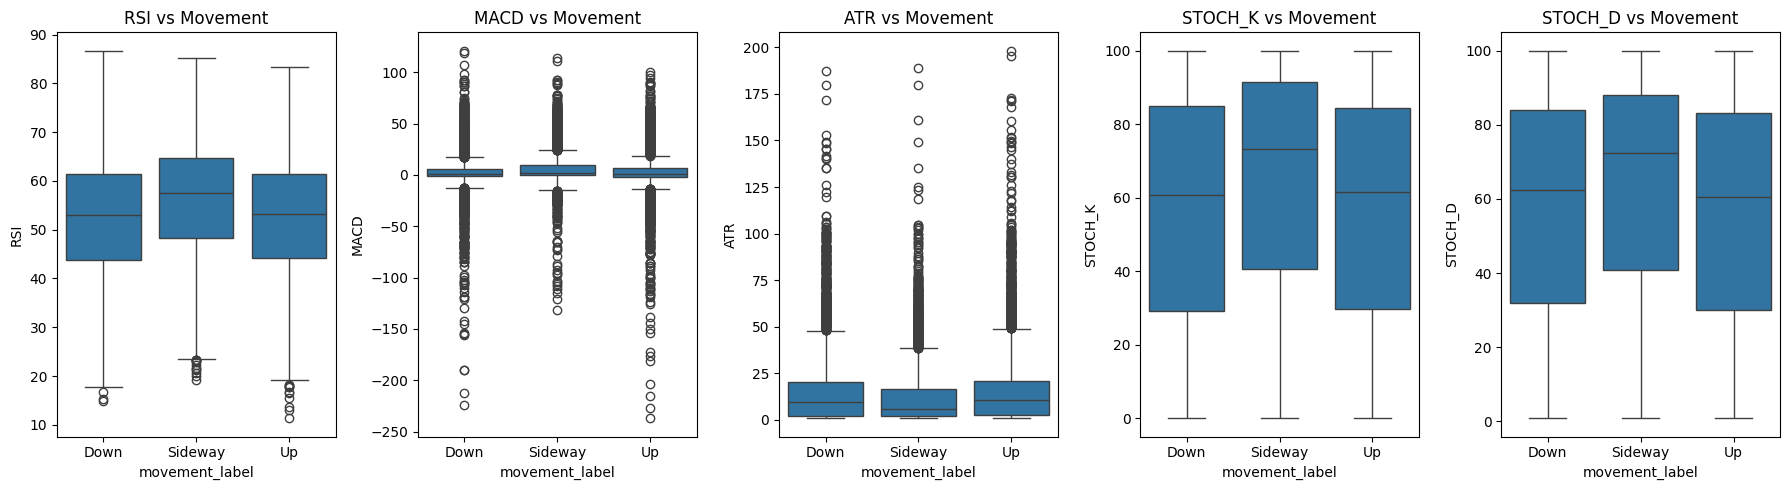

In [ ]:
# Pick a few key features to visualize
features_to_plot = ["RSI", "MACD", "ATR", "STOCH_K", "STOCH_D"]

fig, axes = plt.subplots(1, len(features_to_plot), figsize=(18, 5), sharey=False)
for i, col in enumerate(features_to_plot):
    sns.boxplot(x="movement_label", y=col, data=clean_data, ax=axes[i], order=["Down", "Sideway", "Up"])
    axes[i].set_title(f"{col} vs Movement")
plt.tight_layout()
plt.show()


The boxplots above illustrate the distribution of five technical indicators (RSI, MACD, ATR, Stochastic K, and Stochastic D) across the three movement classes (Down, Sideways, Up).

**Most indicators** (RSI, MACD, Stochastic K/D) display **overlapping ranges and similar medians, offering little separation between classes**. MACD shows strong outliers, reflecting noise.

**ATR is the most informative**: Sideways markets have lower ATR, while trending markets (Up/Down) show higher volatility, consistent with financial intuition.


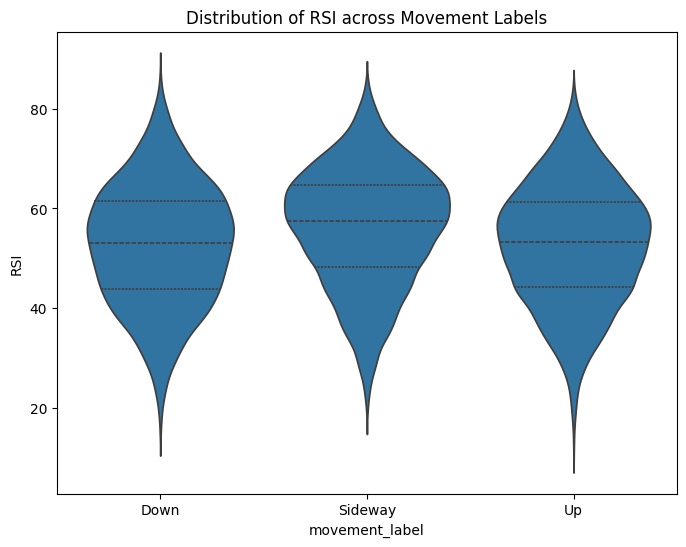

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(x="movement_label", y="RSI", data=clean_data, order=["Down", "Sideway", "Up"], inner="quartile")
plt.title("Distribution of RSI across Movement Labels")
plt.show()

The violin plots show that RSI values overlap heavily across all movement labels, with most distributions centered around 40‚Äì60. This suggests RSI alone does not strongly differentiate Up, Down, and Sideway markets, though Sideway tends to lean slightly higher.

In [ ]:
# Check if balancing is needed
def check_imbalance(percent_max, percent_min):
    imbalance_ratio = percent_max / percent_min
    print(f"\nImbalance Ratio (max/min class size): {imbalance_ratio:.2f}")

    if imbalance_ratio > 1.5:
        print("Significant class imbalance detected. Consider balancing techniques such as SMOTE, undersampling, or class-weight adjustment.")
    else:
        print("Classes are reasonably balanced. No balancing needed.")

check_imbalance(class_percents_03.max(), class_percents_03.min())


Imbalance Ratio (max/min class size): 1.16
Classes are reasonably balanced. No balancing needed.


### Step 3.7: Timed-based Dataset Split

In [ ]:
# Ensure data is sorted by Date
clean_data.sort_values("Date", inplace=True)

In [ ]:
# Split the data
train_df = clean_data[(clean_data["Date"] > "1970-01-01") & (clean_data["Date"] <= "2010-12-31")]
val_df   = clean_data[(clean_data["Date"] > "2011-01-01") & (clean_data["Date"] <= "2020-12-31")]
test_df  = clean_data[(clean_data["Date"] > "2021-01-01") & (clean_data["Date"] <= "2025-06-30")]

print(f"Train size: {train_df.shape[0]}, Val size: {val_df.shape[0]}, Test size: {test_df.shape[0]}")

Train size: 10315, Val size: 2517, Test size: 1124


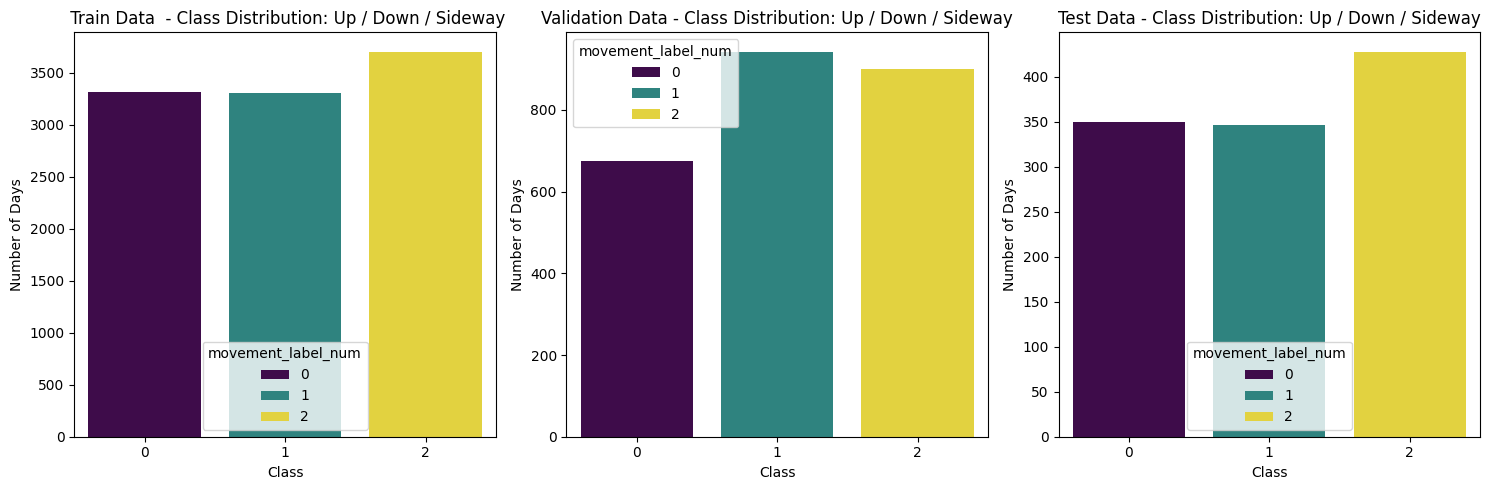

In [ ]:
# Check if any imbalance in data split

class_counts_train = train_df["movement_label_num"].value_counts()
class_percents_train = train_df["movement_label_num"].value_counts(normalize=True) * 100

class_counts_val = val_df["movement_label_num"].value_counts()
class_percents_val = val_df["movement_label_num"].value_counts(normalize=True) * 100

class_counts_test = test_df["movement_label_num"].value_counts()
class_percents_test = test_df["movement_label_num"].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=class_counts_train.index, y=class_counts_train.values,palette="viridis", hue=class_percents_train.index, ax=axes[0])
axes[0].set_xlabel("Movement Label")
axes[0].set_ylabel("Count")
axes[0].set_title(" Train Data  - Class Distribution: Up / Down / Sideway")
axes[0].set_ylabel("Number of Days")
axes[0].set_xlabel("Class")

sns.barplot(x=class_counts_val.index, y=class_counts_val.values, palette="viridis", hue=class_percents_val.index, ax=axes[1] )
axes[1].set_xlabel("Movement Label")
axes[1].set_ylabel("Count")
axes[1].set_title("Validation Data - Class Distribution: Up / Down / Sideway")
axes[1].set_ylabel("Number of Days")
axes[1].set_xlabel("Class")

sns.barplot(x=class_counts_test.index, y=class_counts_test.values, palette="viridis", hue=class_percents_test.index, ax=axes[2] )
axes[2].set_xlabel("Movement Label")
axes[2].set_ylabel("Count")
axes[2].set_title("Test Data - Class Distribution: Up / Down / Sideway")
axes[2].set_ylabel("Number of Days")
axes[2].set_xlabel("Class")


plt.tight_layout()
plt.show()

In [ ]:
# Check if balancing is needed
check_imbalance(class_percents_train.max(), class_percents_train.min())
check_imbalance(class_percents_val.max(), class_percents_val.min())
check_imbalance(class_percents_test.max(), class_percents_test.min())


Imbalance Ratio (max/min class size): 1.12
Classes are reasonably balanced. No balancing needed.

Imbalance Ratio (max/min class size): 1.40
Classes are reasonably balanced. No balancing needed.

Imbalance Ratio (max/min class size): 1.24
Classes are reasonably balanced. No balancing needed.


## Step 4: Model Development

### Step 4.1: Helper Function Declaration

#### Step 4.1.1: Constants Declaration

In [ ]:
CLASS_IDX  = (0, 1, 2)
CLASS_NAMES = ("Down", "Sideway", "Up")

#### Step 4.1.2: Utility to prepare dataset

In [ ]:
def build_dataset_for(feature_cols):

    # Add the target column to the list of columns to check and keep
    all_cols = feature_cols + ["movement_label_num"]

    def drop_na(df):
        mask_bad = df[all_cols].isna().any(axis=1)
        if mask_bad.any():
            print(f"Dropping {mask_bad.sum():,} rows with NaN due to indicators.")
        return df.loc[~mask_bad].copy()

    def check_cols_exist(df):
        available_columns = df.columns.tolist()
        valid_cols = [col for col in all_cols if col in available_columns]
        if len(valid_cols) != len(all_cols):
            missing = set(all_cols) - set(valid_cols)
            print(f"Warning: Missing columns in feature set: {missing}")
        return df[valid_cols]

    tr_na = drop_na(train_df).copy()
    va_na = drop_na(val_df).copy()
    te_na = drop_na(test_df).copy()

    tr_valid = check_cols_exist(tr_na).copy()
    va_valid = check_cols_exist(va_na).copy()
    te_valid = check_cols_exist(te_na).copy()

    y_tr = tr_valid["movement_label_num"]
    y_va = va_valid["movement_label_num"]
    y_te = te_valid["movement_label_num"]

    X_tr, X_va, X_te = tr_valid[feature_cols], va_valid[feature_cols], te_valid[feature_cols]

    return (X_tr, y_tr, tr_valid), (X_va, y_va, va_valid), (X_te, y_te, te_valid)

#### Step 4.1.3: Utility for Metrics Evaluation

In [ ]:
def eval_dict(y_true, y_pred):
    return {
        "precision_macro": float(precision_score(y_true, y_pred, average="macro")),
        "precision_weighted": float(precision_score(y_true, y_pred, average="weighted")),
        "recall_macro": float(recall_score(y_true, y_pred, average="macro")),
        "recall_weighted": float(recall_score(y_true, y_pred, average="weighted")),
        "accuracy": float(accuracy_score(y_true, y_pred)),
        "f1_macro": float(f1_score(y_true, y_pred, average="macro")),
        "f1_weighted": float(f1_score(y_true, y_pred, average="weighted")),
    }

#### Step 4.1.4: Utility to plot Confusion Matrix

In [ ]:
def plot_cm(y_true, y_pred, title, out_path):
    fig, ax = plt.subplots(figsize=(5,4))
    ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        labels=CLASS_IDX, display_labels=CLASS_NAMES,
        cmap="Blues", ax=ax
    )
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(out_path, dpi=140)
    plt.close(fig)

#### Step 4.1.5: Utility to plot OVR, ROC Curve

In [ ]:
def plot_ovr_curves(y_true, proba, title_prefix, out_dir):
    """
    One-vs-Rest PR & ROC curves for multiclass.
    y_true: integer labels; proba: (n_samples, n_classes)
    """
    K = len(CLASS_IDX)
    y_true_bin = np.eye(K)[y_true]  # one-hot

    # Precision‚ÄìRecall
    fig_pr, ax_pr = plt.subplots(figsize=(6,4.2))
    aps = []
    for k, name in enumerate(CLASS_NAMES):
        prec, rec, _ = precision_recall_curve(y_true_bin[:,k], proba[:,k])
        ap = average_precision_score(y_true_bin[:,k], proba[:,k])
        aps.append(ap)
        ax_pr.plot(rec, prec, lw=1.8, label=f"{name} (AP={ap:.3f})")
    ax_pr.set_xlabel("Recall"); ax_pr.set_ylabel("Precision")
    ax_pr.set_title(f"{title_prefix} ‚Äî PR (OvR)")
    ax_pr.legend(fontsize=8); fig_pr.tight_layout()
    pr_path = f"{out_dir}/pr_ovr.png"; fig_pr.savefig(pr_path, dpi=140); plt.close(fig_pr)

    # ROC
    fig_roc, ax_roc = plt.subplots(figsize=(6,4.2))
    aucs = []
    for k, name in enumerate(CLASS_NAMES):
        fpr, tpr, _ = roc_curve(y_true_bin[:,k], proba[:,k])
        auc = roc_auc_score(y_true_bin[:,k], proba[:,k])
        aucs.append(auc)
        ax_roc.plot(fpr, tpr, lw=1.8, label=f"{name} (AUC={auc:.3f})")
    ax_roc.plot([0,1],[0,1],"--",lw=1,color="gray")
    ax_roc.set_xlabel("FPR"); ax_roc.set_ylabel("TPR")
    ax_roc.set_title(f"{title_prefix} ‚Äî ROC (OvR)")
    ax_roc.legend(fontsize=8); fig_roc.tight_layout()
    roc_path = f"{out_dir}/roc_ovr.png"; fig_roc.savefig(roc_path, dpi=140); plt.close(fig_roc)

    return pr_path, roc_path, {"mean_ap": float(np.mean(aps)), "mean_auc": float(np.mean(aucs))}

#### Step 4.1.6: Common Training Function

In [ ]:
def safe_start_run(run_name: str, tags: dict=None, nested: bool=False):
    if not nested and mlflow.active_run() is not None:
        mlflow.end_run()
    return mlflow.start_run(run_name=run_name, nested=nested, tags=tags or {})

In [ ]:
def per_class_tables(y_true, y_pred, labels, label_names, zero_division=0):
    """
    Returns:
      counts_df  : TP/FP/FN/TN per class (+support)
      metrics_df : precision/recall/F1/support per class (+overall rows)
      cm_df      : raw confusion matrix (counts)
      cmn_df     : row-normalized confusion matrix (rates per true class)
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    total = cm.sum()

    # TP/FP/FN/TN
    TP = np.diag(cm)
    FN = cm.sum(axis=1) - TP
    FP = cm.sum(axis=0) - TP
    TN = total - (TP + FP + FN)
    support = cm.sum(axis=1)

    counts_df = pd.DataFrame({
        "class_id": labels,
        "class": [label_names[i] for i in labels],
        "TP": TP, "FP": FP, "FN": FN, "TN": TN,
        "support": support
    })

    # per-class metrics
    p, r, f1, sup = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, zero_division=zero_division
    )
    metrics_df = pd.DataFrame({
        "class_id": labels,
        "class": [label_names[i] for i in labels],
        "precision": p, "recall": r, "f1": f1, "support": sup
    })

    # overall rows (macro, weighted, accuracy)
    macro_p, macro_r, macro_f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro", zero_division=zero_division
    )
    weighted_p, weighted_r, weighted_f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted", zero_division=zero_division
    )
    acc = accuracy_score(y_true, y_pred)

    overall = pd.DataFrame([{
        "class": "OVERALL",
        "precision_macro": macro_p,
        "recall_macro": macro_r,
        "f1_macro": macro_f1,
        "precision_weighted": weighted_p,
        "recall_weighted": weighted_r,
        "f1_weighted": weighted_f1,
        "accuracy": acc,
        "support_total": int(total)
    }])

    with np.errstate(invalid="ignore"):
        cmn = cm / cm.sum(axis=1, keepdims=True)
        cmn = np.nan_to_num(cmn, nan=0.0)

    cm_df  = pd.DataFrame(cm,  index=label_names, columns=label_names)
    cmn_df = pd.DataFrame(cmn, index=label_names, columns=label_names)

    # pretty rounding for report tables
    metrics_df = metrics_df.round(4)
    overall    = overall.round(4)
    cmn_df     = cmn_df.round(4)

    return counts_df, metrics_df, overall, cm_df, cmn_df


In [ ]:
from IPython.display import Image, display

import tempfile, shutil, time

def train_eval_log(pipeline, datasets, model_name: str,
                   phase="baseline", extra_params=None):

    (X_tr, y_tr, _), (X_va, y_va, _), (X_te, y_te, _) = datasets

     # --- Decide training, validation data based phase ---
    fit_on = "train"
    eval_splits = ["train", "val", "test"]
    if phase in ("baseline", "tuning"):
        eval_splits = ["train","val"]
        X_fit, y_fit = X_tr, y_tr
    elif phase == "final":
        eval_splits = ["test"]
        fit_on = "train+val"
        X_fit = pd.concat([X_tr, X_va], axis=0)
        y_fit = np.hstack([y_tr, y_va])
    else:
        raise ValueError("phase must be 'baseline', 'tuning', or 'final'")

    ts = time.strftime("%Y%m%d-%H%M%S")
    with safe_start_run(
        run_name=f"{ts}-{phase}-{model_name}",
        tags={"model": model_name, "phase": phase}):

        tmp = tempfile.mkdtemp()

        # ---- params/context ----
        mlflow.log_param("phase", phase)
        mlflow.set_tag("phase", phase)
        mlflow.log_param("model", model_name)
        mlflow.set_tag("model", model_name)
        mlflow.log_param("fit_on", fit_on)
        mlflow.set_tag("fit_on", fit_on)
        mlflow.log_param("eval_splits", ",".join(eval_splits))
        mlflow.set_tag("eval_splits", ",".join(eval_splits))
        mlflow.log_param("n_features", X_tr.shape[1])
        mlflow.log_param("classes", ",".join(map(str, CLASS_NAMES)))
        mlflow.log_param("train_rows", X_tr.shape[0])
        mlflow.log_param("val_rows",   X_va.shape[0])
        mlflow.log_param("test_rows",  X_te.shape[0])

        # log best_params if passed in
        if extra_params is not None:
            for k, v in extra_params.items():
                mlflow.log_param(f"best_{k}", v)

        # ---- train on chosen fit set ----
        pipeline.fit(X_fit, y_fit)


        # ---- evaluate helper ----
        def eval_and_log_split(X, y, split):
            y_pred = pipeline.predict(X)

            # console summary
            macro_f1 = f1_score(y, y_pred, average="macro")
            print(f"[{model_name}] {split} macro-F1: {macro_f1:.3f}")
            print(classification_report(y, y_pred, target_names=CLASS_NAMES, digits=3))
            print("Confusion matrix:\n", confusion_matrix(y, y_pred))

            # ---- per-class tables ----
            counts_df, metrics_df, overall_df, cm_df, cmn_df = per_class_tables(
                y_true=y, y_pred=y_pred, labels=CLASS_IDX, label_names=CLASS_NAMES
            )

            # metrics to MLflow
            m = eval_dict(y, y_pred)  # accuracy, f1_macro, f1_weighted
            for k, v in m.items():
                mlflow.log_metric(f"{split}_{k}", float(v))

            # save tidy CSV artifacts for the report
            counts_df.to_csv(f"{tmp}/{split}_per_class_counts.csv", index=False)
            metrics_df.to_csv(f"{tmp}/{split}_per_class_metrics.csv", index=False)
            overall_df.to_csv(f"{tmp}/{split}_overall_metrics.csv", index=False)
            cm_df.to_csv(f"{tmp}/{split}_confusion_counts.csv")
            cmn_df.to_csv(f"{tmp}/{split}_confusion_normalized.csv")

            for fname in [
                f"{split}_per_class_counts.csv",
                f"{split}_per_class_metrics.csv",
                f"{split}_overall_metrics.csv",
                f"{split}_confusion_counts.csv",
                f"{split}_confusion_normalized.csv",
            ]:
                mlflow.log_artifact(f"{tmp}/{fname}", artifact_path=f"tables/{split}")

            return y_pred, m

        # ----  Evaluate selected splits only ----
        results = {}
        for split in eval_splits:
            if split == "train":
                yhat, m = eval_and_log_split(X_tr, y_tr, "train")
            elif split == "val":
                yhat, m = eval_and_log_split(X_va, y_va, "val")
            elif split == "test":
                yhat, m = eval_and_log_split(X_te, y_te, "test")
            else:
                raise ValueError(f"Unknown split: {split}")
            results[split] = (yhat, m)


        # ---- artifacts (plots + report) ----
        X_sample = X_fit.head(5).copy()
        try:
            # Confusion matrices for evaluated splits
            for split, (yhat, _) in results.items():
                signature = infer_signature(X_sample, yhat)
                if split == "train":
                    plot_cm(y_tr, yhat, f"{model_name} ‚Äî Train CM", f"{tmp}/cm_train.png")
                    display(Image(f"{tmp}/cm_train.png"))
                elif split == "val":
                    plot_cm(y_va, yhat, f"{model_name} ‚Äî Val CM",   f"{tmp}/cm_val.png")
                    display(Image(f"{tmp}/cm_val.png"))
                elif split == "test":
                    plot_cm(y_te, yhat, f"{model_name} ‚Äî Test CM",  f"{tmp}/cm_test.png")
                    display(Image(f"{tmp}/cm_test.png"))

            for p in ["cm_train.png","cm_val.png","cm_test.png"]:
                pth = f"{tmp}/{p}"
                if os.path.exists(pth):
                    mlflow.log_artifact(pth, artifact_path="plots")

            # PR/ROC (only if proba available & enabled)
            if hasattr(pipeline, "predict_proba"):
                if "train" in results:
                    pr_tr, roc_tr, agg_tr = plot_ovr_curves(y_tr, pipeline.predict_proba(X_tr), f"{model_name} Train", tmp)
                if "val" in results:
                    pr_va, roc_va, agg_va = plot_ovr_curves(y_va, pipeline.predict_proba(X_va), f"{model_name} Val", tmp)
                if "test" in results:
                    pr_te, roc_te, agg_te = plot_ovr_curves(y_te, pipeline.predict_proba(X_te), f"{model_name} Test", tmp)

                for p in [locals().get("pr_tr"), locals().get("roc_tr"),
                          locals().get("pr_va"), locals().get("roc_va"),
                          locals().get("pr_te"), locals().get("roc_te")]:
                    if p:
                        mlflow.log_artifact(p, artifact_path="plots")

                for split, agg in [("train", locals().get("agg_tr")),
                                   ("val",   locals().get("agg_va")),
                                   ("test",  locals().get("agg_te"))]:
                    if agg:
                        mlflow.log_metric(f"{split}_mean_AP",  agg["mean_ap"])
                        mlflow.log_metric(f"{split}_mean_AUC", agg["mean_auc"])

            # Final text report only when we evaluate on test
            if "test" in results:
                yhat_te, _ = results["test"]
                report = classification_report(y_te, yhat_te, target_names=CLASS_NAMES, digits=4)
                with open(f"{tmp}/classification_report_test.txt", "w") as f:
                    f.write(report)
                mlflow.log_artifact(f"{tmp}/classification_report_test.txt", artifact_path="reports")

            # Persist model
            mlflow.sklearn.log_model (sk_model=pipeline,
                                      name=f"{model_name}",
                                      signature=signature,
                                      input_example=X_sample)
            mlflow.log_artifact(
                joblib.dump(pipeline, f"{model_name}.joblib")[0]
            )
        finally:
            shutil.rmtree(tmp, ignore_errors=True)

    # aggregate results for quick notebook table
    out = {k: v[1] for k, v in results.items()}
    return pipeline, out

### Step 4.2: Setting up Experiment Tracking

Setting up experiment tracking with MLFlow

In [ ]:
# Kill existing process if any
! pkill -f ngrok

In [ ]:
!ngrok config add-authtoken 2t8TIG1geBuF6yFcNXZYkkxTqzg_7qGykBf4NYA9AKwvB9u8R

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
get_ipython().system_raw("mlflow ui --port 5000 &")

In [9]:
# 4.1 Configure MLflow to log to Google Drive
os.makedirs(MLFLOW_PATH, exist_ok=True)

# file-based tracking (local to Drive)
#mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_tracking_uri(MLFLOW_PATH)

# will create if it doesn"t exist
mlflow.set_experiment("ITI105-SP500-Movement")

# we‚Äôll log explicitly for full control
mlflow.sklearn.autolog(disable=True)

# Create a client to confirm tracking directory
client = MlflowClient()
print("MLflow Tracking URI:", mlflow.get_tracking_uri())

MLflow Tracking URI: /content/drive/MyDrive/NYP/ITI105/mllogs


In [ ]:
public_url = ngrok.connect(5000)
print("MLflow Tracking URL:", public_url)

MLflow Tracking URL: NgrokTunnel: "https://a624ef9ed458.ngrok-free.app" -> "http://localhost:5000"


### Step 4.3: Setting-Up Features Columns

Based on our RDA, we will exclude high correlated features as our input. This is to avoid multicollinearity problem.

Here, we also splitting the input features between Logistic Regression and Tree based model (Decision Tree, Random Forest, and XGBoost).

In [ ]:
base_extra = ["DAILY_RANGE", "CLOSE_TO_OPEN_GAP"]
base_feats = ["Pct_Change_t", "LOG_VOLUME"]
base_indicators = [
    "RSI",
    "MACD",
    "BB_WIDTH",
    "ATR",
    "STOCH_K"
]
base_feature_cols = base_feats + base_indicators  + base_extra

tree_feats = ["Pct_Change_t","LOG_VOLUME"]
tree_indicators = [
    "MA20",
    "RSI",
    "MACD",
    "EMA20",
    "BB_WIDTH",
    "ATR",
    "STOCH_K"
]
tree_feature_cols = tree_feats + tree_indicators + base_extra

xgb_feature_cols = tree_feats + tree_indicators  + base_extra

FEATURE_SETS = {
    "linear": base_feature_cols,       # logistic regression
    "tree": tree_feature_cols,         # decision tree
    "rf": tree_feature_cols,           # random forest
    "xgb": xgb_feature_cols            # xgboost
}

### Step 4.4: Build Pipeline

First, we want to declare pipelines for each algorithm: Logistic Regression with feature scaling, and tree-based models (Decision Tree, Random Forest, XGBoost) directly on the data.

Note, wrapping the model workflow in Pipeline ensures preprocessing and training steps are organized, reproducible, and easy to tune.

In [ ]:
pipe_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=2000,  random_state=42
    ))
])

pipe_tree = Pipeline([
    ("clf", DecisionTreeClassifier(random_state=42))
])

pipe_rf = Pipeline([
    ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

pipe_xgb = Pipeline([
    ("clf", XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1,
        subsample=1.0,
        colsample_bytree=1.0,
        n_estimators=150
    ))
])

### Step 4.4: Train


##### Logistic ‚Äî baseline | #9 features #####
[20250828-192423-baseline-linear] train macro-F1: 0.380
              precision    recall  f1-score   support

        Down      0.447     0.168     0.244      3311
     Sideway      0.396     0.549     0.460      3302
          Up      0.396     0.481     0.434      3702

    accuracy                          0.402     10315
   macro avg      0.413     0.399     0.380     10315
weighted avg      0.412     0.402     0.382     10315

Confusion matrix:
 [[ 556 1257 1498]
 [ 269 1813 1220]
 [ 419 1503 1780]]
[20250828-192423-baseline-linear] val macro-F1: 0.379
              precision    recall  f1-score   support

        Down      0.286     0.292     0.289       674
     Sideway      0.511     0.368     0.428       943
          Up      0.374     0.478     0.420       900

    accuracy                          0.387      2517
   macro avg      0.390     0.379     0.379      2517
weighted avg      0.402     0.387     0.388      2517

Confu

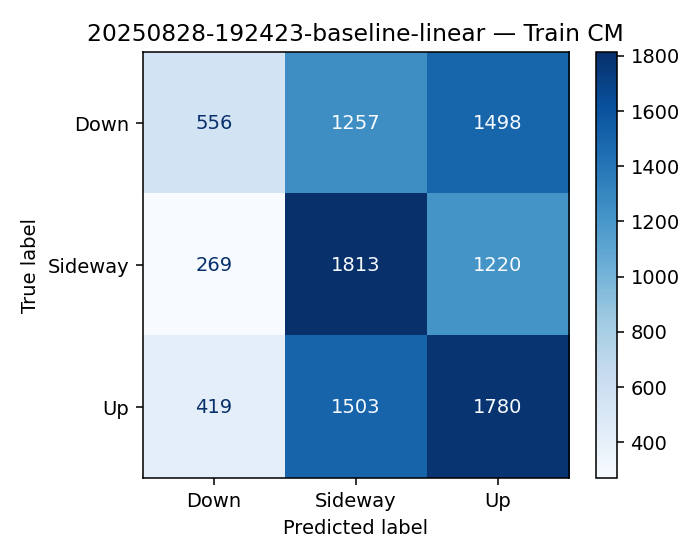

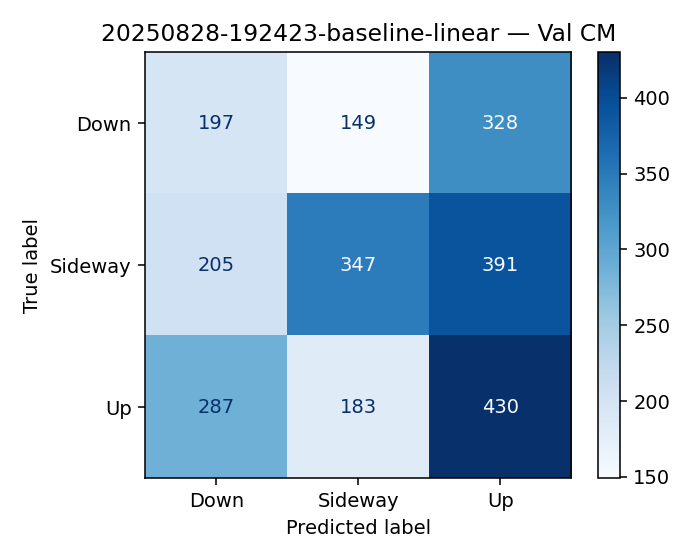

üèÉ View run 20250828-192423-baseline-20250828-192423-baseline-linear at: http://localhost:5000/#/experiments/216316106023882445/runs/906c40bb522f4df7bfb70a8fbfc9de64
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-192423-baseline-linear.joblib

##### Decision Tree ‚Äî baseline | #11 features #####
[20250828-192423-baseline-tree] train macro-F1: 1.000
              precision    recall  f1-score   support

        Down      1.000     1.000     1.000      3311
     Sideway      1.000     1.000     1.000      3302
          Up      1.000     1.000     1.000      3702

    accuracy                          1.000     10315
   macro avg      1.000     1.000     1.000     10315
weighted avg      1.000     1.000     1.000     10315

Confusion matrix:
 [[3311    0    0]
 [   0 3302    0]
 [   0    0 3702]]
[20250828-192423-baseline-tree] val macro-F1: 0.352
              precision    recall  f1-scor

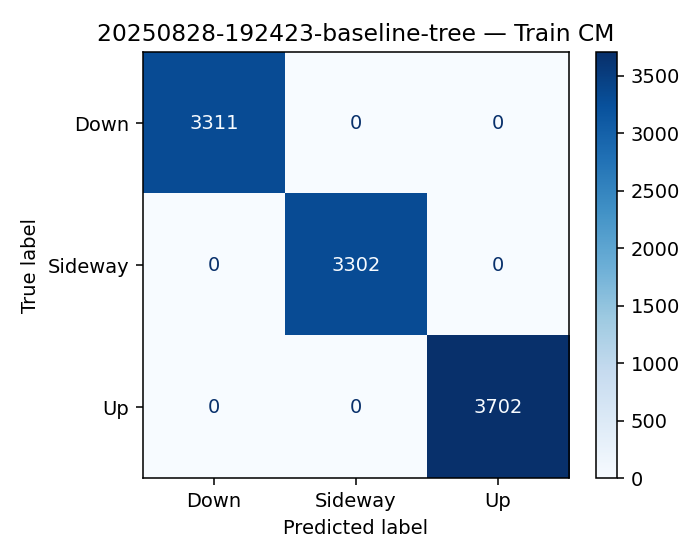

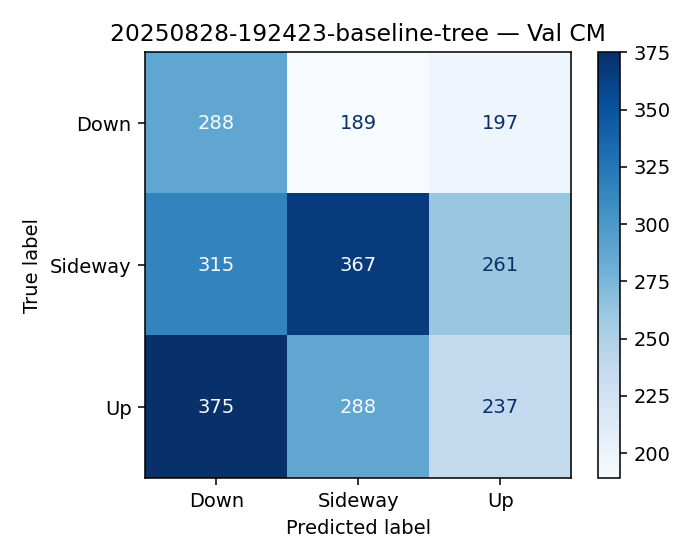

üèÉ View run 20250828-192439-baseline-20250828-192423-baseline-tree at: http://localhost:5000/#/experiments/216316106023882445/runs/d971eaae350b4f1997092fa8450bbc95
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-192423-baseline-tree.joblib

##### Random Forest ‚Äî baseline | #11 features #####
[20250828-192423-baseline-rf] train macro-F1: 1.000
              precision    recall  f1-score   support

        Down      1.000     1.000     1.000      3311
     Sideway      1.000     1.000     1.000      3302
          Up      1.000     1.000     1.000      3702

    accuracy                          1.000     10315
   macro avg      1.000     1.000     1.000     10315
weighted avg      1.000     1.000     1.000     10315

Confusion matrix:
 [[3311    0    0]
 [   0 3302    0]
 [   0    0 3702]]
[20250828-192423-baseline-rf] val macro-F1: 0.371
              precision    recall  f1-score   supp

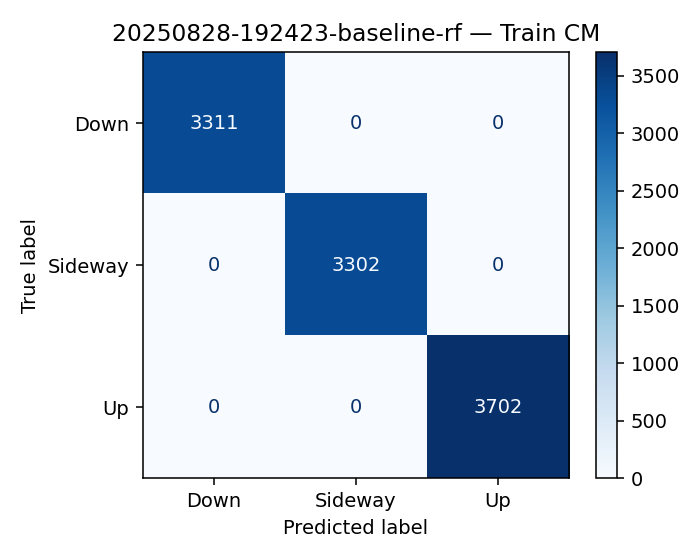

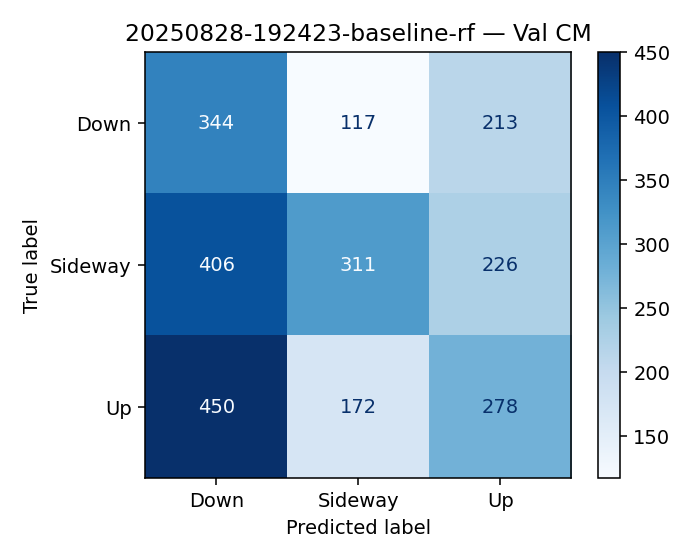

üèÉ View run 20250828-192452-baseline-20250828-192423-baseline-rf at: http://localhost:5000/#/experiments/216316106023882445/runs/0a8fb60de5e24abc9d5009ccc8350aa9
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-192423-baseline-rf.joblib

##### XGBoost ‚Äî baseline | #11 features #####
[20250828-192423-baseline-xgb] train macro-F1: 0.949
              precision    recall  f1-score   support

        Down      0.962     0.940     0.951      3311
     Sideway      0.943     0.956     0.949      3302
          Up      0.943     0.951     0.947      3702

    accuracy                          0.949     10315
   macro avg      0.949     0.949     0.949     10315
weighted avg      0.949     0.949     0.949     10315

Confusion matrix:
 [[3112   85  114]
 [  48 3157   97]
 [  75  106 3521]]
[20250828-192423-baseline-xgb] val macro-F1: 0.354
              precision    recall  f1-score   support

   

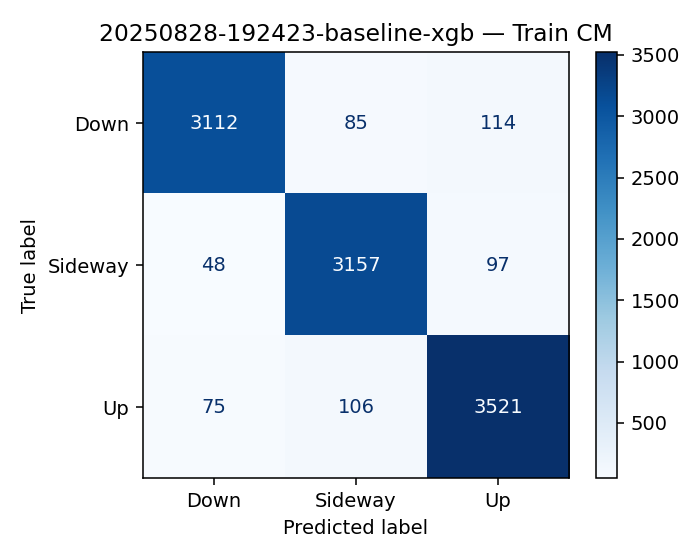

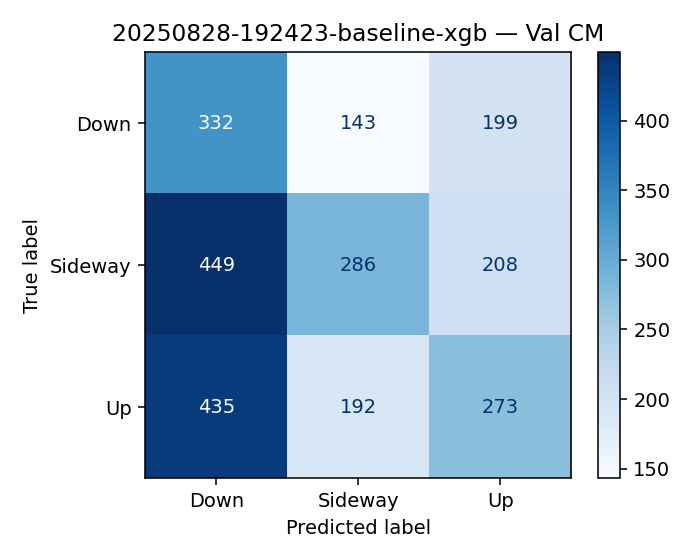

üèÉ View run 20250828-192521-baseline-20250828-192423-baseline-xgb at: http://localhost:5000/#/experiments/216316106023882445/runs/65f1b56b5b804699b6410e7559566212
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-192423-baseline-xgb.joblib


Model  n_features  Train macro-F1 (base)  Train acc (base)  \
0       Logistic           9               0.379573          0.402230   
1  Random Forest          11               1.000000          1.000000   
2  Decision Tree          11               1.000000          1.000000   
3        XGBoost          11               0.949184          0.949103   

   Val macro-F1 (base)  Val acc (base)  
0             0.378884        0.386969  
1             0.371362        0.370679  
2             0.352197        0.354390  
3             0.354207        0.353993

In [ ]:
# Train & evaluate all models
phase = "baseline"
PIPES = {
    "Logistic":         (pipe_linear, "linear"),
    "Decision Tree":    (pipe_tree,  "tree"),
    "Random Forest":    (pipe_rf,    "rf"),
    "XGBoost":          (pipe_xgb,   "xgb")
}

baseline_rows = []
fitted_baseline = {}

# take the timestamp - to identify the cycle
ts = time.strftime("%Y%m%d-%H%M%S")

for name, (pipe, key) in PIPES.items():

    # variables declaration
    model_name = f"{ts}-{phase}-{key}"

    # prepare training dataset
    cols = FEATURE_SETS[key]
    ds = build_dataset_for(cols)

    # start training
    print(f"\n##### {name} ‚Äî baseline | #{len(cols)} features #####")
    fitted, metrics = train_eval_log(
        pipeline=pipe,
        datasets=ds,
        model_name=model_name,
        phase=phase
    )

    # save model
    meta = {
        "model_name": f"{model_name}",
        "created_by": "Isak Rabin",
        "feature_set_key": key,
        "features": FEATURE_SETS[key],
        "classes": list(CLASS_NAMES),
        "class_indices": list(range(len(CLASS_NAMES))),
        "random_state": 42
    }
    joblib.dump(fitted, f"{MODELS_PATH}/{model_name}.joblib", compress=3)
    with open( f"{MODELS_PATH}/{model_name}.metadata.json", "w") as f:
        json.dump(meta, f, indent=2)
    print("Saved:", f"{MODELS_PATH}/{model_name}.joblib")

    # store test result - reporting
    fitted_baseline[name] = fitted
    baseline_rows.append({
        "Model": name,
        "n_features": len(cols),
        "Train macro-F1 (base)":  metrics["train"]["f1_macro"],
        "Train acc (base)":       metrics["train"]["accuracy"],
        "Val macro-F1 (base)":  metrics["val"]["f1_macro"],
        "Val acc (base)":       metrics["val"]["accuracy"]
    })

# save all training results, display on console
baseline_df = (pd.DataFrame(baseline_rows)
               .sort_values("Val macro-F1 (base)", ascending=False)
               .sort_values("Val acc (base)", ascending=False)
               .reset_index(drop=True))
baseline_df.to_csv(f"{ts}-{phase}-results.csv", index=False)

baseline_df

**Observations**

Across all four baseline models, we observe clear overfitting: training scores are very high (Decision Tree and Random Forest even reached perfect F1 = 1.0), but validation performance drops sharply.

- **Logistic Regression**: Most balanced, with train/val macro-F1 around 0.3795 ‚Äì 0.378884. Performs better on Sideway detection but struggles with Down/Up classes.
- **Decision Tree**: Memorizes training set (F1 = 1.0) but generalizes poorly, with validation macro-F1 = 0.3521.
- **Random Forest**: Also shows overfitting (train F1 = 1.0), slightly better validation than Decision Tree (macro-F1 = 0.3713), but still weak on Up/Sideway balance.
- **XGBoost**: Very strong on training (F1 = 0.9491) but validation drops to 0.3542, showing it also overfits heavily.

**Summary**

- Logistic Regression, despite being the simplest, gives the most realistic baseline (avoids memorization).
- Tree-based models (DT, RF, XGB) capture patterns too well on training but fail to generalize, highlighting the need for regularization, feature refinement, or better tuning to improve robustness.

### Step 4.5 Tuning

In [ ]:
grid_lr = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs", "saga"]
}

grid_dt = {
    "clf__max_depth": [3, 5, 7],
    "clf__min_samples_split": [0.01, 0.02],
    "clf__min_samples_leaf": [0.005, 0.01],
    "clf__criterion": ["gini"],
}

grid_rf = {
    "clf__n_estimators": [200, 300],
    "clf__max_depth": [None, 12],
    "clf__max_features": ["sqrt"],
    "clf__min_samples_leaf": [1, 2, 5],
    "clf__min_samples_split": [2, 5, 10]
}

grid_xgb = {
    "clf__n_estimators": [200, 400],
    "clf__learning_rate": [0.03, 0.1],
    "clf__max_depth": [4, 6],
    "clf__subsample": [0.8, 1.0],
    "clf__min_child_weight": [1, 3],
    "clf__colsample_bytree": [0.8, 1.0],
    "clf__reg_lambda": [0.5, 1.0, 2.0],
    "clf__reg_alpha": [0, 0.1]
}


In [ ]:
def run_grid(name, base_pipe, grid, X, y, scoring="f1_macro", n_jobs=-1):

    tscv = TimeSeriesSplit(n_splits=5)
    gs = GridSearchCV(estimator=base_pipe, param_grid=grid,
                      scoring=scoring, cv=tscv, n_jobs=n_jobs,
                      verbose=1, refit=True)

    ts = time.strftime("%Y%m%d-%H%M%S")
    with mlflow.start_run(run_name=f"{ts}-gridsearch-{name}"):
        mlflow.log_param("grid_model", name)
        mlflow.log_param("scoring", scoring)

        # run fine-tuning
        gs.fit(X, y)

        # GridSearchCV table (top 20)
        cvres = pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)
        top_path = f"{name}_grid_top20.csv"
        cvres.head(20).to_csv(top_path, index=False)
        mlflow.log_artifact(top_path, artifact_path="grid")

        # Best params/score
        mlflow.log_metric("best_cv_f1_macro", float(gs.best_score_))
        for k, v in gs.best_params_.items():
            mlflow.log_param(f"best_{k}", v)

    print(f"[{name}] best f1_macro (GridSearchCV): {gs.best_score_:.4f}; params: {gs.best_params_}")

    return gs.best_estimator_, gs.best_params_, gs.best_score_


Fitting 5 folds for each of 8 candidates, totalling 40 fits
üèÉ View run 20250828-192536-gridsearch-Logistic at: http://localhost:5000/#/experiments/216316106023882445/runs/759d13cb1bf045bea5e5b9f635aecaa7
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
[Logistic] best f1_macro (GridSearchCV): 0.3589; params: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

##### Logistic ‚Äî tuned retrain (fit on train+val) #####
[20250828-192536-tuning-linear] train macro-F1: 0.380
              precision    recall  f1-score   support

        Down      0.447     0.168     0.244      3311
     Sideway      0.396     0.549     0.460      3302
          Up      0.396     0.481     0.434      3702

    accuracy                          0.402     10315
   macro avg      0.413     0.399     0.380     10315
weighted avg      0.412     0.402     0.382     10315

Confusion matrix:
 [[ 556 1257 1498]
 [ 269 1813 1220]
 [ 419 1503 1780]]
[20250828-192536-tuning-line

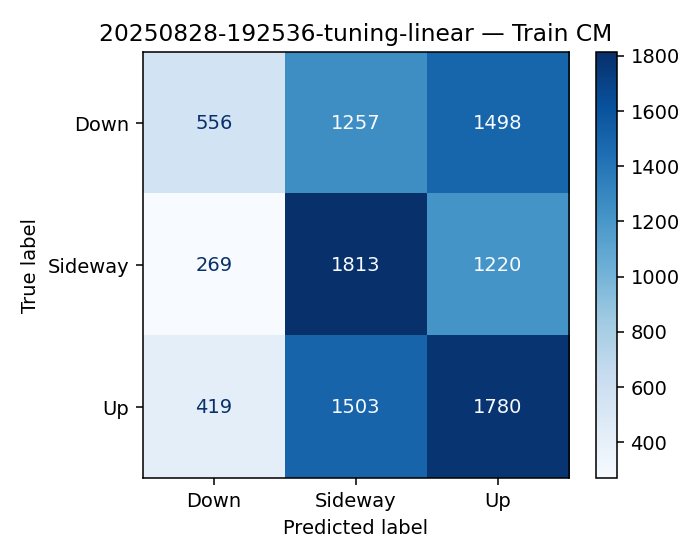

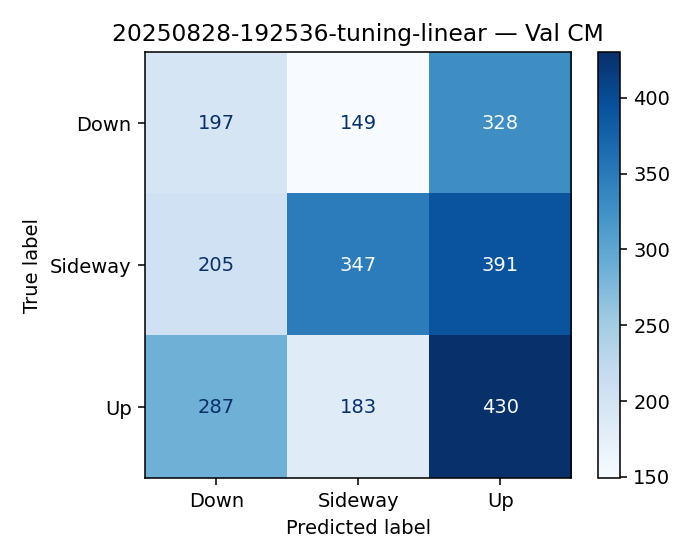

üèÉ View run 20250828-192541-tuning-20250828-192536-tuning-linear at: http://localhost:5000/#/experiments/216316106023882445/runs/a8d3308d1d694d619fe1ba7e26504f73
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-192536-tuning-linear.joblib
Fitting 5 folds for each of 12 candidates, totalling 60 fits
üèÉ View run 20250828-192553-gridsearch-Decision Tree at: http://localhost:5000/#/experiments/216316106023882445/runs/1ed593fa85ff4c79aa752a082fcd4cbe
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
[Decision Tree] best f1_macro (GridSearchCV): 0.3551; params: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 0.005, 'clf__min_samples_split': 0.01}

##### Decision Tree ‚Äî tuned retrain (fit on train+val) #####
[20250828-192536-tuning-tree] train macro-F1: 0.402
              precision    recall  f1-score   support

        Down      0.458   

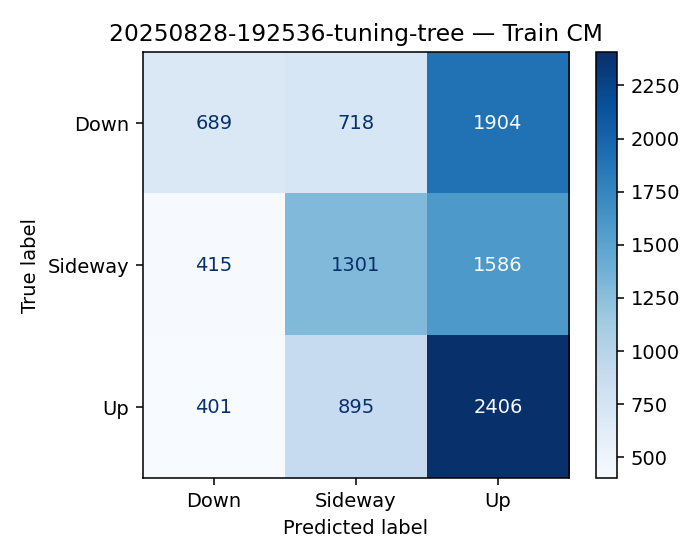

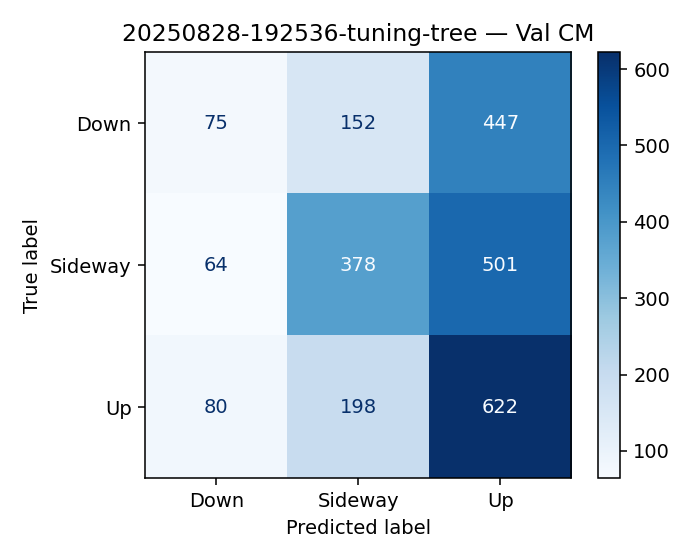

üèÉ View run 20250828-192557-tuning-20250828-192536-tuning-tree at: http://localhost:5000/#/experiments/216316106023882445/runs/9dc11c88af5e4026ac86a3775d9fc637
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-192536-tuning-tree.joblib
Fitting 5 folds for each of 36 candidates, totalling 180 fits
üèÉ View run 20250828-192610-gridsearch-Random Forest at: http://localhost:5000/#/experiments/216316106023882445/runs/1aa3483645aa43d196173de74cfa1fc4
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
[Random Forest] best f1_macro (GridSearchCV): 0.3315; params: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}

##### Random Forest ‚Äî tuned retrain (fit on train+val) #####
[20250828-192536-tuning-rf] train macro-F1: 0.939
              precision    recall  f1-score   support

      

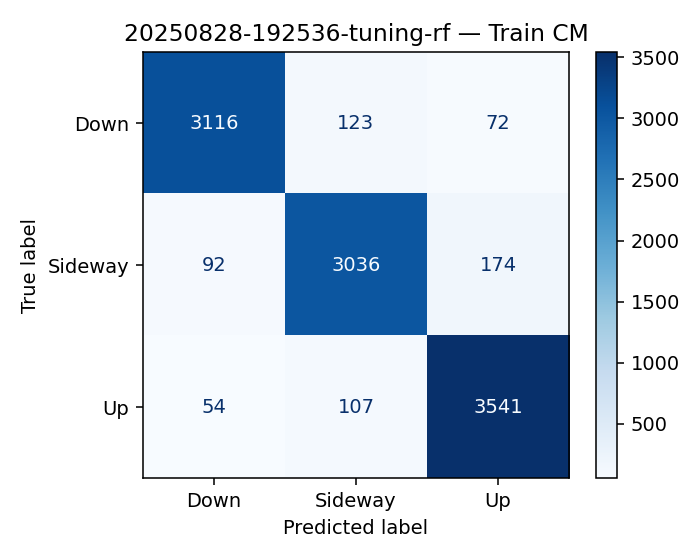

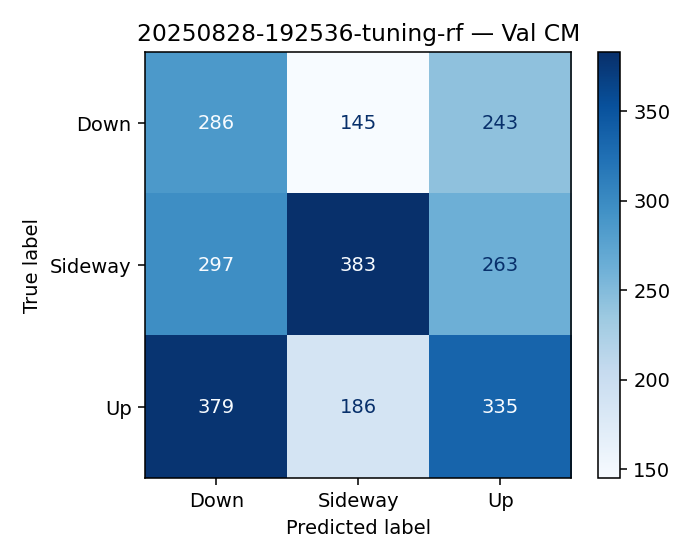

üèÉ View run 20250828-194155-tuning-20250828-192536-tuning-rf at: http://localhost:5000/#/experiments/216316106023882445/runs/0cfa4a155eb44acf893655d57f9156ed
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-192536-tuning-rf.joblib
Fitting 5 folds for each of 384 candidates, totalling 1920 fits
üèÉ View run 20250828-194233-gridsearch-XGBoost at: http://localhost:5000/#/experiments/216316106023882445/runs/dcccdc489b6d49938f55226a12367fb0
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
[XGBoost] best f1_macro (GridSearchCV): 0.3331; params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 6, 'clf__min_child_weight': 1, 'clf__n_estimators': 400, 'clf__reg_alpha': 0.1, 'clf__reg_lambda': 2.0, 'clf__subsample': 0.8}

##### XGBoost ‚Äî tuned retrain (fit on train+val) #####
[20250828-192536-tuning-xgb] train macro-F1: 0.947
              

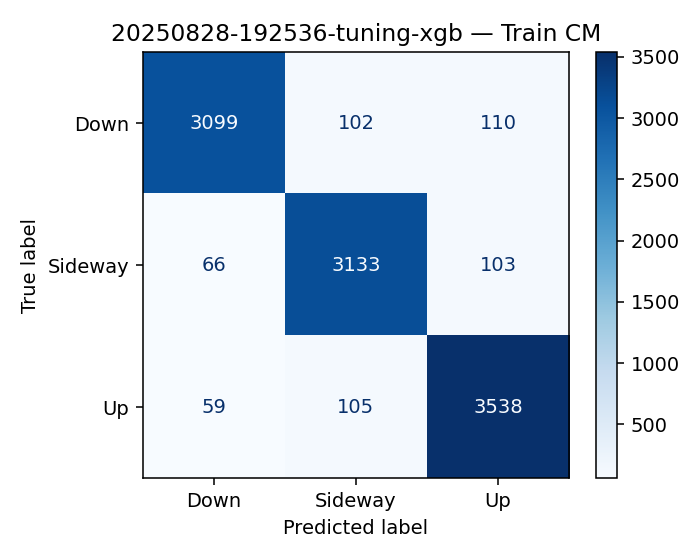

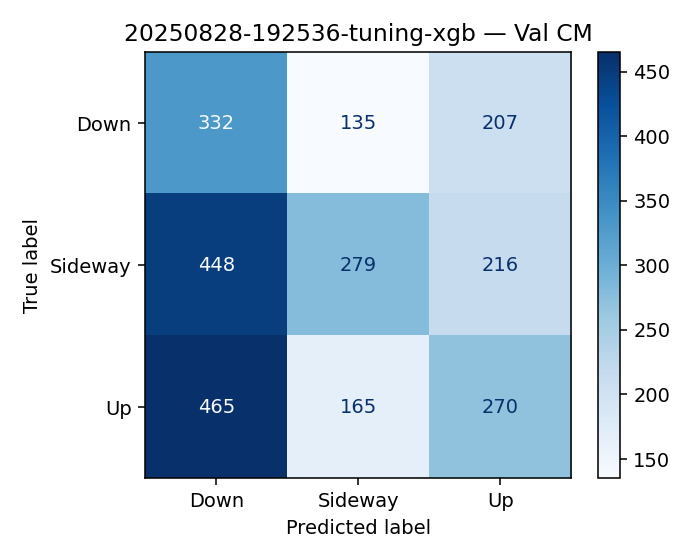

üèÉ View run 20250828-204126-tuning-20250828-192536-tuning-xgb at: http://localhost:5000/#/experiments/216316106023882445/runs/fc8c3153330e41b093d7a435141314fb
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-192536-tuning-xgb.joblib


Model  n_features  Train macro-F1 (tuned)  \
0    20250828-192536-tuning-tree          11                0.402027   
1      20250828-192536-tuning-rf          11                0.939419   
2  20250828-192536-tuning-linear           9                0.379573   
3     20250828-192536-tuning-xgb          11                0.947079   

   Train acc (tuned)  Val macro-F1 (tuned)  Val acc (tuned)  
0           0.426175              0.374680         0.427096  
1           0.939699              0.398917         0.398888  
2           0.402230              0.378884         0.386969  
3           0.947164              0.350540         0.350020

In [ ]:
# Tuned, Re-Train & Re-evaluate all models
phase = "tuning"
TUNED_PIPES = {
    "Logistic":         (pipe_linear, grid_lr,  "linear"),
    "Decision Tree":    (pipe_tree,   grid_dt,  "tree"),
    "Random Forest":    (pipe_rf,     grid_rf,  "rf"),
    "XGBoost":           (pipe_xgb,    grid_xgb, "xgb"),
}

tuned_rows = []
best_estimators = {}

# take the timestamp - to identify the cycle
ts = time.strftime("%Y%m%d-%H%M%S")
for name, (base_pipe, grid, key) in TUNED_PIPES.items():

    # variables declaration
    model_name = f"{ts}-{phase}-{key}"

    # prepare dataset for tuning
    (X_tr, y_tr, _), (X_va, y_va, _), (X_te, y_te, _) = build_dataset_for(FEATURE_SETS[key])

    # find the best parameter
    best_est, best_params, best_cv = run_grid(
        name, base_pipe, grid, X_tr, y_tr, scoring="f1_macro"
    )
    best_estimators[name] = (best_est, best_params, key)

    # re-train
    print(f"\n##### {name} ‚Äî tuned retrain (fit on train+val) #####")
    ds = ((X_tr, y_tr, None), (X_va, y_va, None), (X_te, y_te, None))

    fitted, metrics = train_eval_log(
        pipeline=best_est,
        datasets=ds,
        model_name=model_name,
        phase=phase,
        extra_params=best_params
    )

    # save model
    meta = {
        "model_name": f"{model_name}",
        "created_by": "Isak Rabin",
        "feature_set_key": key,
        "features": FEATURE_SETS[key],
        "classes": list(CLASS_NAMES),
        "class_indices": list(range(len(CLASS_NAMES))),
        "random_state": 42
    }
    joblib.dump(fitted, f"{MODELS_PATH}/{model_name}.joblib", compress=3)
    with open(f"{MODELS_PATH}/{model_name}.metadata.json", "w") as f:
        json.dump(meta, f, indent=2)
    print("Saved:", f"{MODELS_PATH}/{model_name}.joblib")

    # store test result - reporting
    tuned_rows.append({
        "Model": model_name,
        "n_features": len(FEATURE_SETS[key]),
        "Train macro-F1 (tuned)":  metrics["train"]["f1_macro"],
        "Train acc (tuned)":       metrics["train"]["accuracy"],
        "Val macro-F1 (tuned)":  metrics["val"]["f1_macro"],
        "Val acc (tuned)":       metrics["val"]["accuracy"]
    })

# save all training results, display on console
tuned_df = (pd.DataFrame(tuned_rows)
            .sort_values("Val macro-F1 (tuned)", ascending=False)
            .sort_values("Val acc (tuned)", ascending=False)
            .reset_index(drop=True))
tuned_df.to_csv(f"{ts}-{phase}-results.csv", index=False)

tuned_df

**Observations**

- Logistic Regression
    - Macro-F1 remains ~0.37 on both train and validation (very consistent).
    - Handles Sideway relatively better, but weak on Down class.
    - Shows no overfitting, but overall predictive power is limited.

- Decision Tree
    - Train macro-F1 improved to ~0.40, but validation ~0.37.
    - Stronger at detecting Up (high recall), but struggles on Down.
    - Still prone to underfitting/instability despite tuning.

- Random Forest
    - Very high training score (macro-F1 ~0.94), still heavily overfits.
    - Validation improves slightly to ~0.39, with more balanced class performance than baseline.

- XGBoost
    - Training F1 nearly perfect (~0.94), but validation falls to ~0.35.
    - Overfitting persists even after tuning, with recall bias toward Down class.


**Summary**

- Logistic Regression remains the most stable baseline (no overfitting, but low ceiling).
- Tree-based models (Decision Tree, Random Forest, XGBoost) still overfit: they learn training data well but fail to generalize, with validation macro-F1 stuck in the 0.35‚Äì0.40 range.
- Improvements will likely require stronger regularization, feature engineering, or rebalancing techniques rather than tuning alone.

### Step 4.6: Final Test

In [ ]:
def finalize_and_test(best_estimators, feature_sets,
                      build_dataset_for, train_eval_log):

    # variables declaration
    ts = time.strftime("%Y%m%d-%H%M%S")
    phase = "final"

    ds_cache = {}
    def get_ds(k):
        if k not in ds_cache:
            ds_cache[k] = build_dataset_for(feature_sets[k])
        return ds_cache[k]

    test_rows, final_models = [], {}
    for name, (best_est, best_params, key) in best_estimators.items():

        # variables declaration
        model_name = f"{ts}-{phase}-{key}"

        # prepare dataset
        ds = get_ds(key)

        # final test
        print(f"\n##### {name} ‚Äî FINAL #####")
        fitted, metrics = train_eval_log(
            pipeline=best_est,
            datasets=ds,
            model_name=model_name,
            phase=phase,
            extra_params=best_params
        )

        # save model
        meta = {
            "model_name": f"{model_name}",
            "created_by": "Isak Rabin",
            "feature_set_key": key,
            "features": FEATURE_SETS[key],
            "classes": list(CLASS_NAMES),
            "class_indices": list(range(len(CLASS_NAMES))),
            "random_state": 42
        }
        joblib.dump(fitted, f"{MODELS_PATH}/{model_name}.joblib", compress=3)
        with open(f"{MODELS_PATH}/{model_name}.metadata.json", "w") as f:
            json.dump(meta, f, indent=2)
        print("Saved:", f"{MODELS_PATH}/{model_name}.joblib")

        # save result
        final_models[name] = fitted
        test_rows.append({
            "Model": name,
            "n_features": len(feature_sets[key]),
            "Test macro-F1 (test)": metrics["test"]["f1_macro"],
            "Test acc (test)":      metrics["test"]["accuracy"]
        })

    # generate report, and display on console
    test_df = (pd.DataFrame(test_rows)
               .sort_values(["Test macro-F1 (test)","Test acc (test)"], ascending=[False, False])
               .reset_index(drop=True))
    test_df.to_csv(f"{ts}-{phase}-results.csv", index=False)

    return test_df, final_models


##### Logistic ‚Äî FINAL #####
[20250828-204148-final-linear] test macro-F1: 0.301
              precision    recall  f1-score   support

        Down      0.348     0.023     0.043       350
     Sideway      0.441     0.260     0.327       346
          Up      0.394     0.825     0.533       428

    accuracy                          0.401      1124
   macro avg      0.394     0.369     0.301      1124
weighted avg      0.394     0.401     0.317      1124

Confusion matrix:
 [[  8  51 291]
 [  3  90 253]
 [ 12  63 353]]


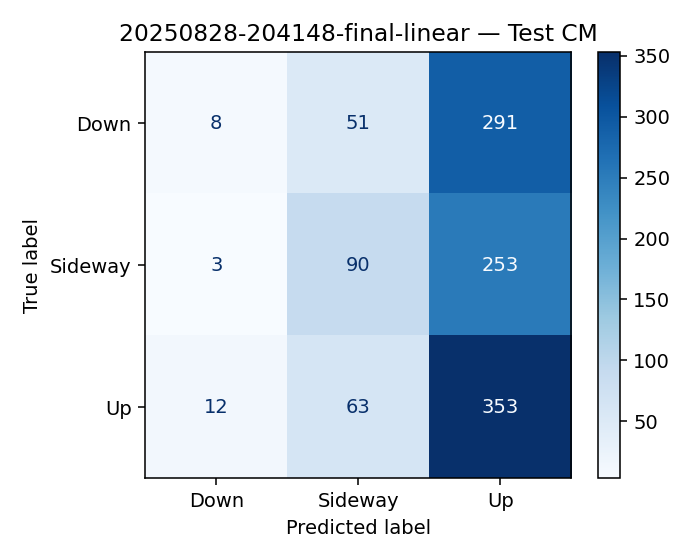

üèÉ View run 20250828-204149-final-20250828-204148-final-linear at: http://localhost:5000/#/experiments/216316106023882445/runs/83a7f280d004426992170f0fa9a79054
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-204148-final-linear.joblib

##### Decision Tree ‚Äî FINAL #####
[20250828-204148-final-tree] test macro-F1: 0.364
              precision    recall  f1-score   support

        Down      0.459     0.049     0.088       350
     Sideway      0.435     0.566     0.492       346
          Up      0.428     0.636     0.511       428

    accuracy                          0.431      1124
   macro avg      0.441     0.417     0.364      1124
weighted avg      0.440     0.431     0.373      1124

Confusion matrix:
 [[ 17 111 222]
 [  8 196 142]
 [ 12 144 272]]


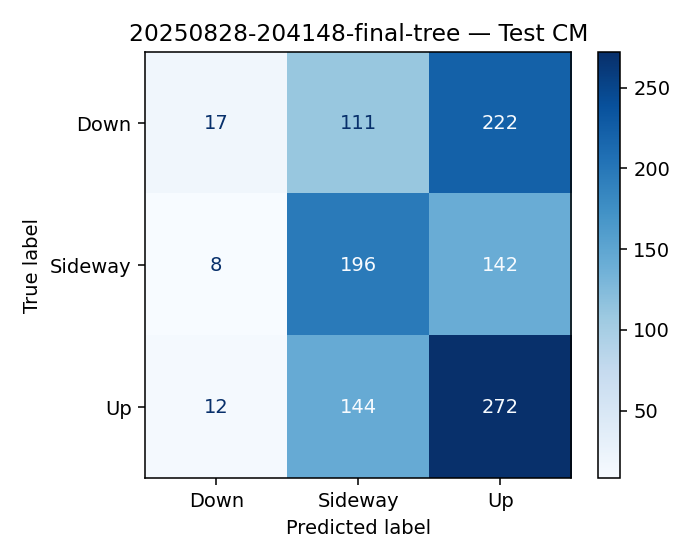

üèÉ View run 20250828-204157-final-20250828-204148-final-tree at: http://localhost:5000/#/experiments/216316106023882445/runs/22e7c30a944a4801b0f887b2f919b0ac
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-204148-final-tree.joblib

##### Random Forest ‚Äî FINAL #####
[20250828-204148-final-rf] test macro-F1: 0.355
              precision    recall  f1-score   support

        Down      0.338     0.151     0.209       350
     Sideway      0.479     0.260     0.337       346
          Up      0.402     0.731     0.519       428

    accuracy                          0.406      1124
   macro avg      0.406     0.381     0.355      1124
weighted avg      0.405     0.406     0.366      1124

Confusion matrix:
 [[ 53  38 259]
 [ 49  90 207]
 [ 55  60 313]]


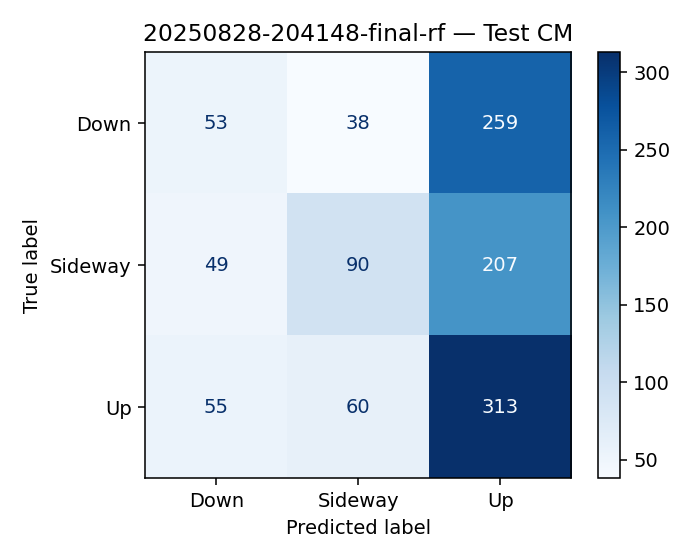

üèÉ View run 20250828-204206-final-20250828-204148-final-rf at: http://localhost:5000/#/experiments/216316106023882445/runs/6f602eae8a584cf39183afc63bad0612
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-204148-final-rf.joblib

##### XGBoost ‚Äî FINAL #####
[20250828-204148-final-xgb] test macro-F1: 0.384
              precision    recall  f1-score   support

        Down      0.313     0.314     0.314       350
     Sideway      0.444     0.309     0.365       346
          Up      0.427     0.530     0.473       428

    accuracy                          0.395      1124
   macro avg      0.395     0.385     0.384      1124
weighted avg      0.397     0.395     0.390      1124

Confusion matrix:
 [[110  54 186]
 [120 107 119]
 [121  80 227]]


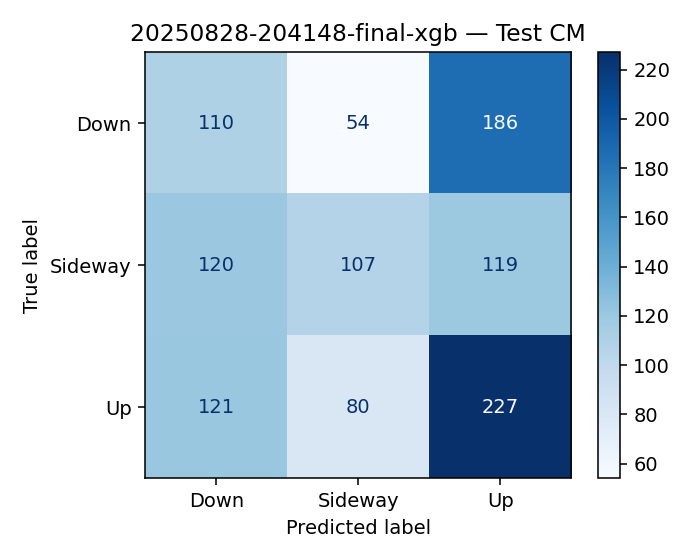

üèÉ View run 20250828-204249-final-20250828-204148-final-xgb at: http://localhost:5000/#/experiments/216316106023882445/runs/756ba8ec553042f0b0d3a71e5d1bc5d4
üß™ View experiment at: http://localhost:5000/#/experiments/216316106023882445
Saved: /content/drive/MyDrive/NYP/ITI105/mllogs/models/20250828-204148-final-xgb.joblib


Model  n_features  Test macro-F1 (test)  Test acc (test)
0        XGBoost          11              0.383773         0.395018
1  Decision Tree          11              0.363659         0.431495
2  Random Forest          11              0.354931         0.405694
3       Logistic           9              0.300999         0.401246

In [ ]:
# save all training results, display on console
test_df, final_models = finalize_and_test(
    best_estimators=best_estimators,
    feature_sets=FEATURE_SETS,
    build_dataset_for=build_dataset_for,
    train_eval_log=train_eval_log
)

test_df

**Observation**

- **Logistic Regression**: Test macro-F1 0.30, accuracy 0.40. Performs well on Up (recall 0.83), but fails badly on Down (recall 0.02). Stable but weak overall.
- **Decision Tree**: Test macro-F1 0.36, accuracy 0.43. Best at detecting Sideway and Up, but Down remains very poor. Slightly more balanced than Logistic.
- **Random Forest**: Test macro-F1 0.36, accuracy 0.41. Good recall on Up (0.73) but weak on Down and Sideway. Overfitting still evident despite tuning.
- **XGBoost**: Test macro-F1 0.38, accuracy 0.39. Most balanced across all three classes, giving moderate recall for Down (0.31) and better trade-off overall.

**Summary**

- All models plateau around 0.30 - 0.38 macro-F1 on test data, which is significantly below the target success metrics set in the project proposal.
- Logistic Regression remains the simplest and most stable baseline, while XGBoost achieves the best balance across classes, though still limited by data complexity and imbalance.
- Further improvements will require feature engineering, class balancing, and stronger regularization.

### Step 4.7: Stop Tracking

In [ ]:
# Call this to close the current tunnel/session cleanly
try:
    ngrok.disconnect(http_tunnel.public_url)
except Exception:
    pass
ngrok.kill()

# Summary

### Model Performance Comparison (Training - Tuning - Test)

| Model              | Train Macro-F1 | Val Macro-F1 (Tuning) | Test Macro-F1 | Test Accuracy | Key Notes |
|--------------------|----------------|------------------------|---------------|---------------|-----------|
| Logistic Regression | 0.37           | 0.37                  | **0.30**      | 0.40          | Stable, no overfitting; performs best on *Sideway* but very weak on *Down*. |
| Decision Tree       | 1.00 ‚Üí 0.35    | 0.37                  | **0.36**      | 0.43          | Huge overfitting reduced after tuning; stronger on *Up* and *Sideway*, but *Down* remains poorly detected. |
| Random Forest       | 1.00 ‚Üí 0.37    | 0.39                  | **0.35**      | 0.40          | Severe overfitting on train, but generalization improves after tuning; high recall on *Up*, weak on *Down*. |
| XGBoost             | 0.94 ‚Üí 0.35           | 0.35                  | **0.38**      | 0.39          | Strongest balance across classes in test; modest recall for *Down* but overall best macro-F1. |

---

### Key Findings
- **Overfitting was a major issue** for tree-based models (Decision Tree, Random Forest, XGBoost), seen from perfect/near-perfect training scores but weaker validation/test results.  
- **Logistic Regression**, while simple, was the most stable model, though its predictive ceiling is low. It struggles heavily with the *Down* class.  
- **XGBoost achieved the best overall balance on the test set**, but still far below project success metrics (target F1 > 0.65).  
- Across all models, *Down* movements were consistently the hardest to predict, while *Sideway* and *Up* were detected more reliably.  
- **Macro-F1 scores plateaued at 0.30 - 0.38 on test**, showing models capture some patterns but fail to generalize strongly to unseen data.  

---

### Future Improvements
1. **Feature Engineering**:  
   - Add more financial indicators (e.g., volatility clustering, sector indices, volume shocks).  
   - Explore lag features and rolling windows to better capture temporal dependencies.  

2. **Class Imbalance Handling**:contentReference:  
   - Use oversampling (SMOTE/ADASYN), undersampling, or class-weight adjustments.  
   - Experiment with cost-sensitive learning to emphasize the *Down* class.  

3. **Regularization & Tuning**:contentReference:  
   - Apply stronger regularization to tree-based models (max depth, min samples per split/leaf, learning rate schedules).  
   - Use early stopping in XGBoost to prevent overfitting.  

4. **Model Extensions**:  
   - Try ensemble methods (stacking or soft voting) to combine strengths of Logistic and XGBoost.  
   - Consider temporal CV (rolling window validation) to reflect real-world market prediction more closely.  

5. **Data Expansion**:  
   - Incorporate macroeconomic indicators (interest rates, inflation, sentiment indices) to enrich predictive context.  
   - Use higher-frequency intraday data to capture finer patterns if feasible.  

---
